In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *
from config import (MATPLOTLIB_PARAMS)

plt.rcParams.update(MATPLOTLIB_PARAMS)

In [2]:
df_kems = kem_data_process("data/kem_bench_oqs_20_iter_20250121.csv")

df_kems

,Algorithm,Iteration,KeyGen(ms),Encaps(ms),Decaps(ms),TotalTime(ms)
0,frodo640aes,1,2.581,0.803,0.724,4.108
1,frodo640aes,2,0.536,0.773,0.761,2.070
2,frodo640aes,3,0.570,0.404,0.336,1.310
3,frodo640aes,4,0.289,0.391,0.400,1.080
4,frodo640aes,5,0.310,0.437,0.455,1.202
...,...,...,...,...,...,...
1035,hqc256,16,5.859,12.356,18.625,36.840
1036,hqc256,17,6.195,12.341,18.656,37.192
1037,hqc256,18,6.162,12.349,18.653,37.164
1038,hqc256,19,6.158,12.342,18.649,37.149


In [3]:
df_qkdkems = kem_data_process("data/kem_bench_qkdkemprovider_20_iter_20250121.csv")

df_qkdkems

,Algorithm,Iteration,KeyGen(ms),Encaps(ms),Decaps(ms),TotalTime(ms)
0,qkd_frodo640aes,1,4.888,0.748,0.563,6.199
1,qkd_frodo640aes,2,0.483,0.702,0.448,1.633
2,qkd_frodo640aes,3,0.410,0.494,0.444,1.348
3,qkd_frodo640aes,4,0.424,0.554,0.492,1.470
4,qkd_frodo640aes,5,0.432,0.698,0.593,1.723
...,...,...,...,...,...,...
355,qkd_hqc256,16,6.195,12.380,18.638,37.213
356,qkd_hqc256,17,6.199,12.389,18.666,37.254
357,qkd_hqc256,18,6.198,12.376,18.539,37.113
358,qkd_hqc256,19,6.132,12.312,18.676,37.120


In [4]:
# Count unique algorithms with
std_algorithms = df_kems['Algorithm'].unique()

print(f"Number of distinct algorithms: {len(std_algorithms)}")
print("\nPQC Algorithms found:")
for algo in sorted(std_algorithms):
    print(f"- {algo}")

Number of distinct algorithms: 18

PQC Algorithms found:
- bikel1
- bikel3
- bikel5
- frodo1344aes
- frodo1344shake
- frodo640aes
- frodo640shake
- frodo976aes
- frodo976shake
- hqc128
- hqc192
- hqc256
- kyber1024
- kyber512
- kyber768
- mlkem1024
- mlkem512
- mlkem768


In [5]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_qkdkems[df_qkdkems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD-PQC algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD-PQC algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [6]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

,NumIterations,KeyGen(ms)_mean,KeyGen(ms)_std,KeyGen(ms)_min,KeyGen(ms)_max,Encaps(ms)_mean,Encaps(ms)_std,Encaps(ms)_min,Encaps(ms)_max,Decaps(ms)_mean,Decaps(ms)_std,Decaps(ms)_min,Decaps(ms)_max,TotalTime(ms)_mean,TotalTime(ms)_std,TotalTime(ms)_min,TotalTime(ms)_max
Algorithm,,,,,,,,,,,,,,,,,
bikel1,18,0.151,0.010,0.143,0.174,0.034,0.003,0.032,0.041,0.546,0.036,0.515,0.667,0.731,0.034,0.701,0.842
bikel3,18,0.391,0.012,0.381,0.418,0.073,0.002,0.072,0.080,1.470,0.020,1.454,1.527,1.933,0.030,1.910,2.025
bikel5,18,0.955,0.009,0.947,0.988,0.153,0.003,0.150,0.166,3.933,0.039,3.912,4.071,5.041,0.044,5.013,5.192
frodo1344aes,18,0.748,0.035,0.712,0.833,1.025,0.035,0.985,1.088,0.981,0.040,0.942,1.070,2.753,0.097,2.641,2.936
frodo1344shake,18,2.576,0.083,2.445,2.668,2.735,0.094,2.594,2.847,2.706,0.100,2.560,2.859,8.017,0.263,7.608,8.285
frodo640aes,18,0.294,0.080,0.243,0.570,0.378,0.062,0.339,0.563,0.365,0.066,0.321,0.550,1.037,0.176,0.908,1.494
frodo640shake,18,0.718,0.014,0.706,0.755,0.776,0.013,0.766,0.815,0.757,0.006,0.749,0.768,2.251,0.024,2.225,2.327
frodo976aes,18,0.420,0.027,0.402,0.509,0.594,0.023,0.577,0.672,0.570,0.034,0.548,0.681,1.584,0.066,1.528,1.739
frodo976shake,18,1.464,0.067,1.374,1.607,1.557,0.074,1.471,1.718,1.514,0.064,1.442,1.667,4.536,0.187,4.321,4.924


In [7]:
df_qkdkems_stats = kem_data_summary(df_qkdkems, warmup=2)

df_qkdkems_stats

,NumIterations,KeyGen(ms)_mean,KeyGen(ms)_std,KeyGen(ms)_min,KeyGen(ms)_max,Encaps(ms)_mean,Encaps(ms)_std,Encaps(ms)_min,Encaps(ms)_max,Decaps(ms)_mean,Decaps(ms)_std,Decaps(ms)_min,Decaps(ms)_max,TotalTime(ms)_mean,TotalTime(ms)_std,TotalTime(ms)_min,TotalTime(ms)_max
Algorithm,,,,,,,,,,,,,,,,,
qkd_bikel1,18,0.182,0.007,0.176,0.202,0.069,0.004,0.066,0.081,0.502,0.027,0.458,0.571,0.753,0.031,0.706,0.844
qkd_bikel3,18,0.433,0.016,0.422,0.489,0.108,0.002,0.106,0.114,1.478,0.016,1.459,1.511,2.019,0.030,1.990,2.112
qkd_bikel5,18,1.097,0.161,0.984,1.556,0.200,0.015,0.185,0.231,4.289,0.456,3.926,5.193,5.586,0.601,5.099,6.577
qkd_frodo1344aes,18,0.868,0.047,0.792,0.959,1.201,0.119,1.094,1.630,1.090,0.064,1.014,1.234,3.160,0.153,2.931,3.561
qkd_frodo1344shake,18,2.682,0.024,2.659,2.758,2.848,0.023,2.818,2.917,2.797,0.072,2.751,3.067,8.327,0.089,8.234,8.639
qkd_frodo640aes,18,0.347,0.064,0.286,0.499,0.451,0.096,0.370,0.698,0.386,0.083,0.323,0.593,1.185,0.239,0.981,1.723
qkd_frodo640shake,18,0.763,0.021,0.741,0.808,0.814,0.013,0.803,0.848,0.769,0.026,0.751,0.859,2.346,0.052,2.300,2.499
qkd_frodo976aes,18,0.485,0.018,0.467,0.530,0.669,0.022,0.654,0.728,0.605,0.021,0.587,0.669,1.758,0.045,1.711,1.843
qkd_frodo976shake,18,1.544,0.034,1.511,1.615,1.647,0.038,1.621,1.782,1.570,0.022,1.555,1.641,4.761,0.066,4.694,4.951


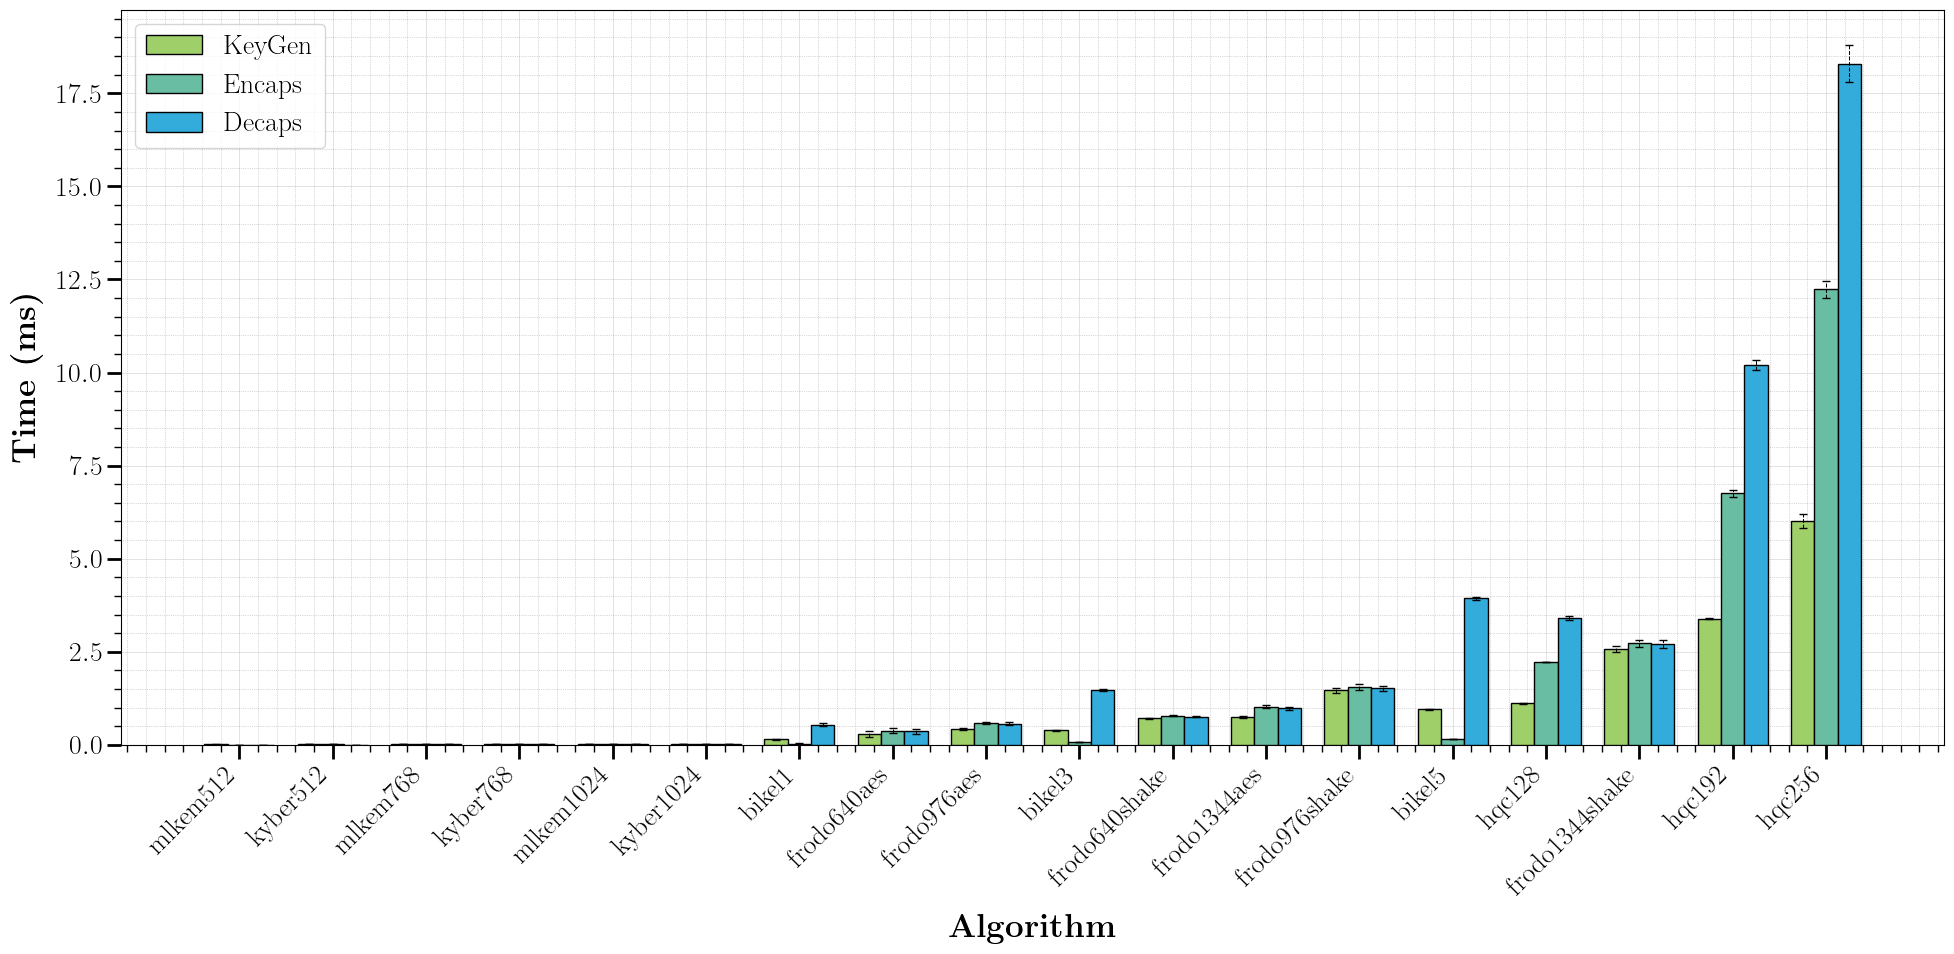

In [8]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_ops_times.pdf", y_start=None)

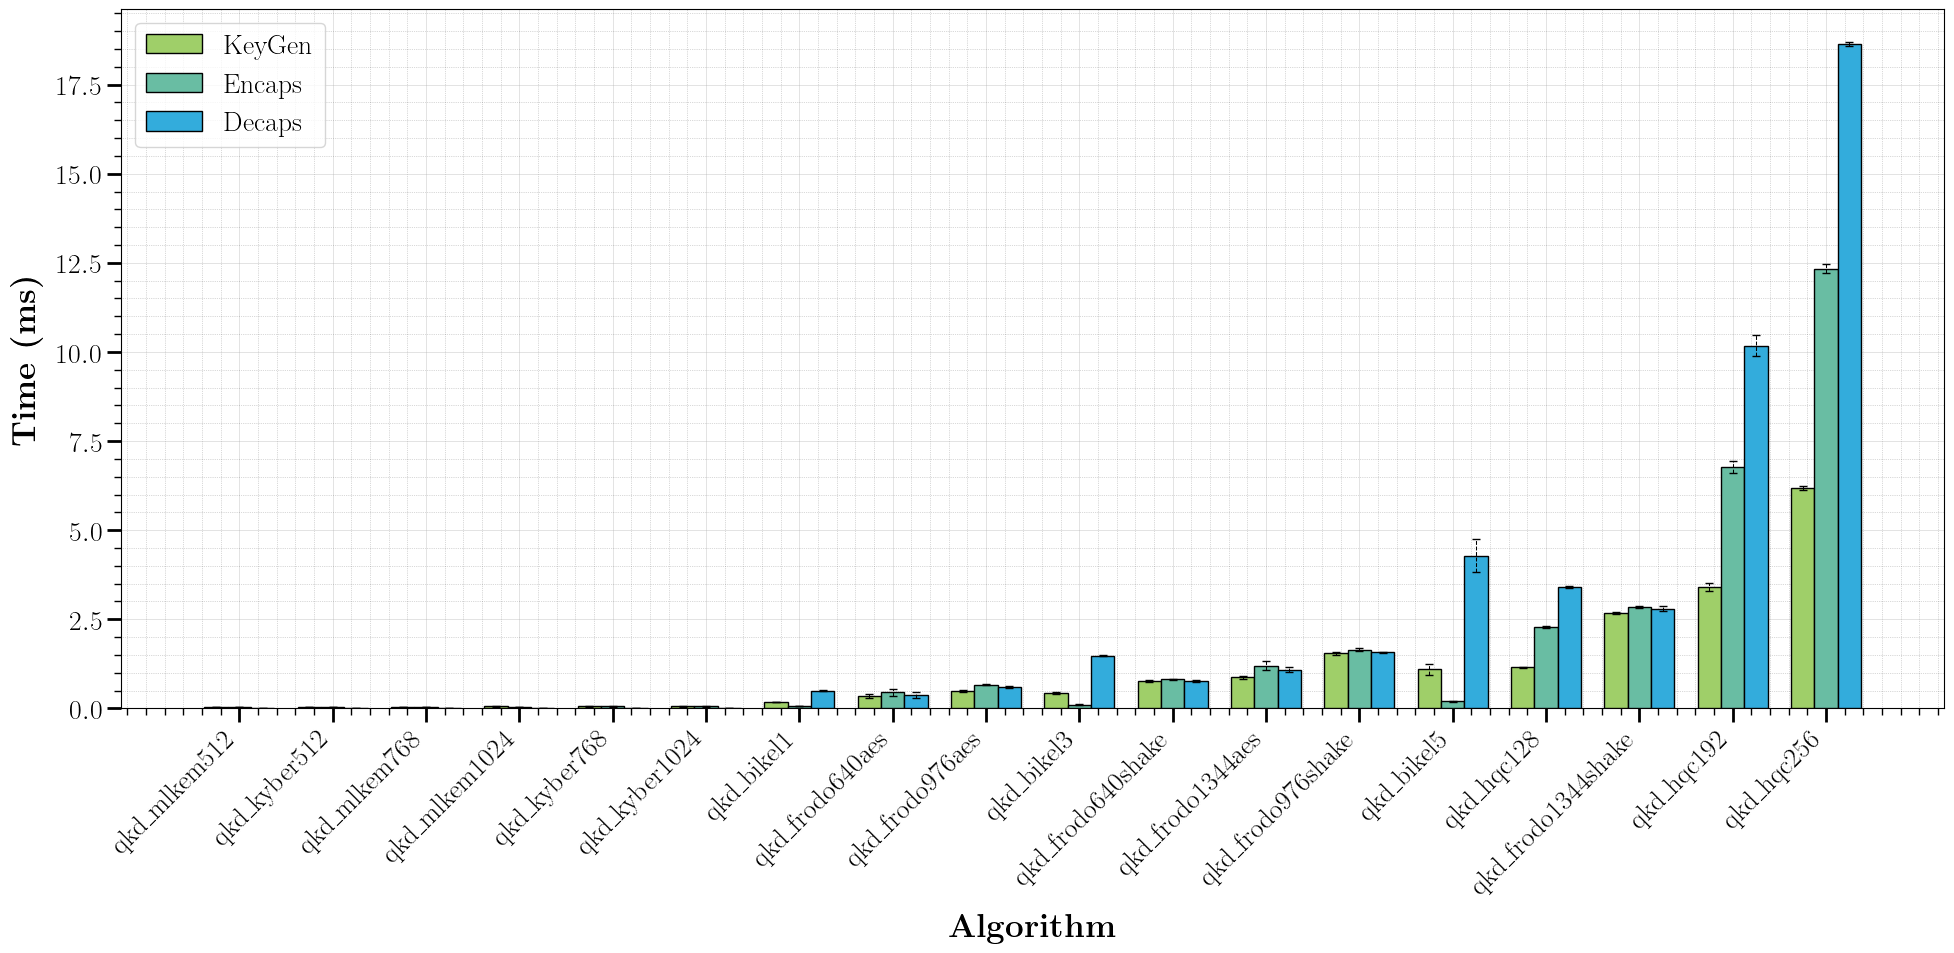

In [9]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_ops_times.pdf", y_start=None)

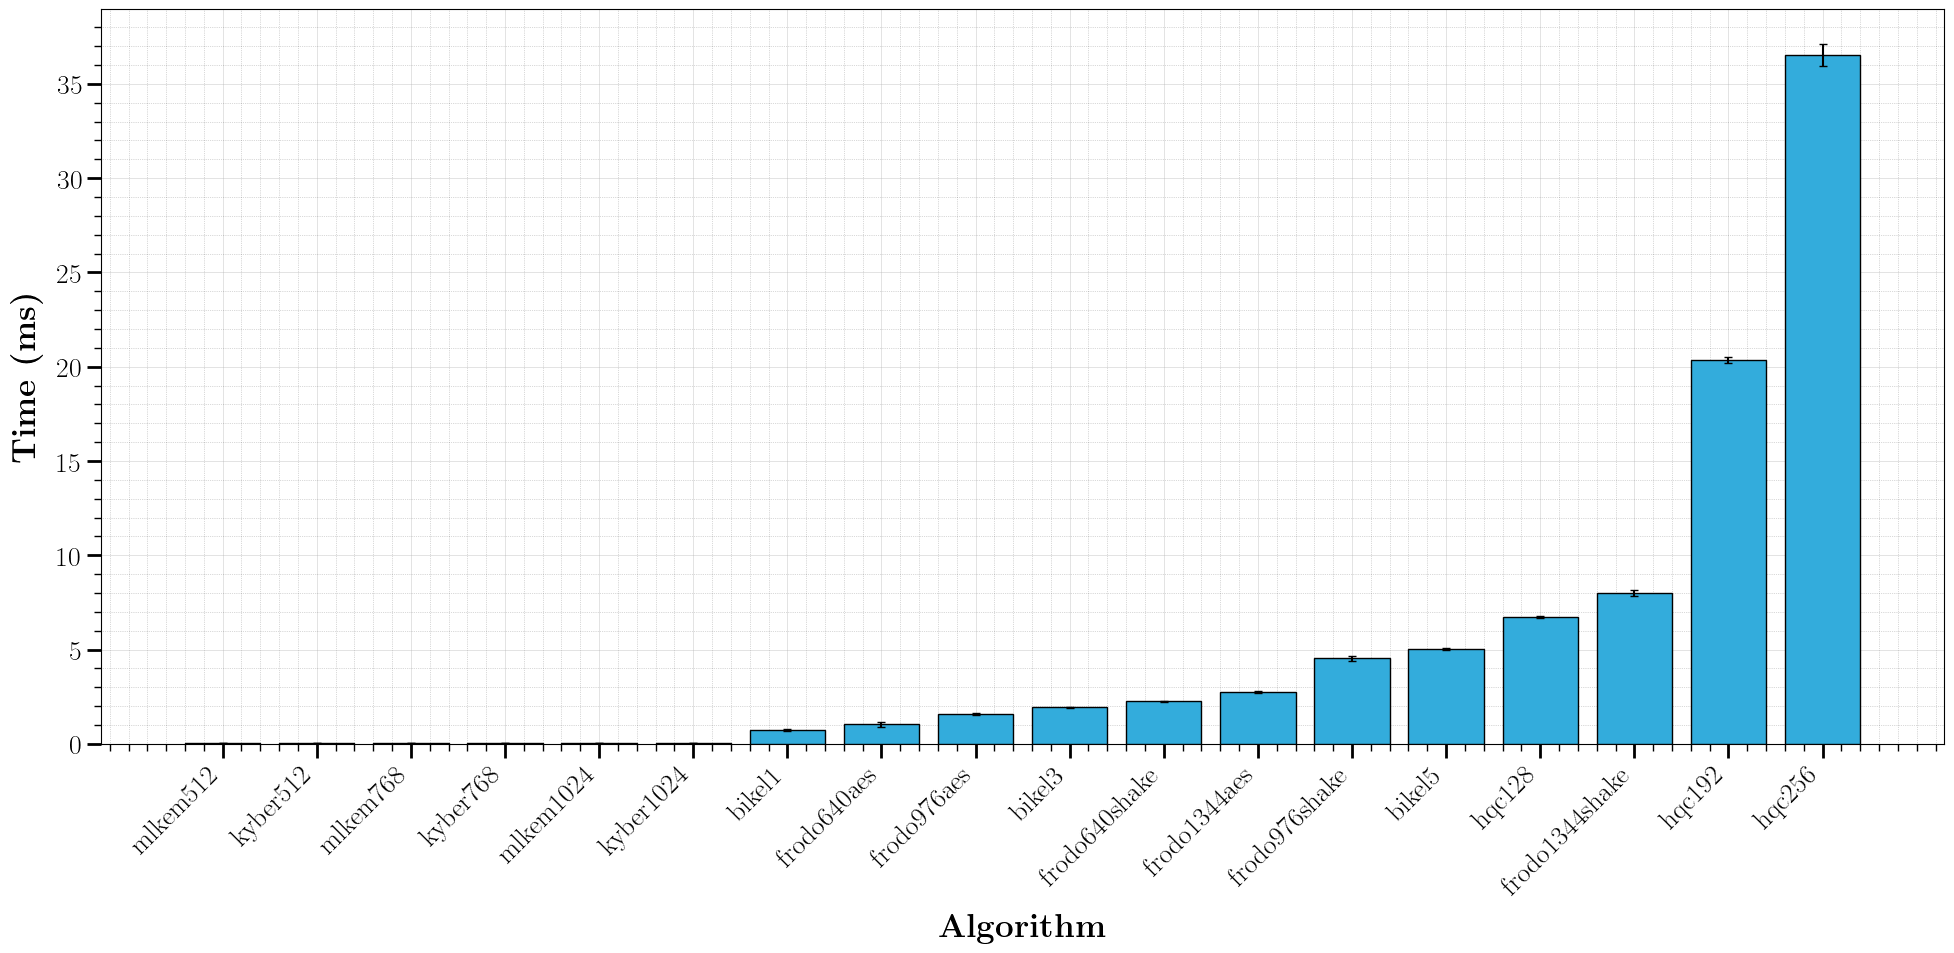

In [10]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times.pdf", y_start=None)

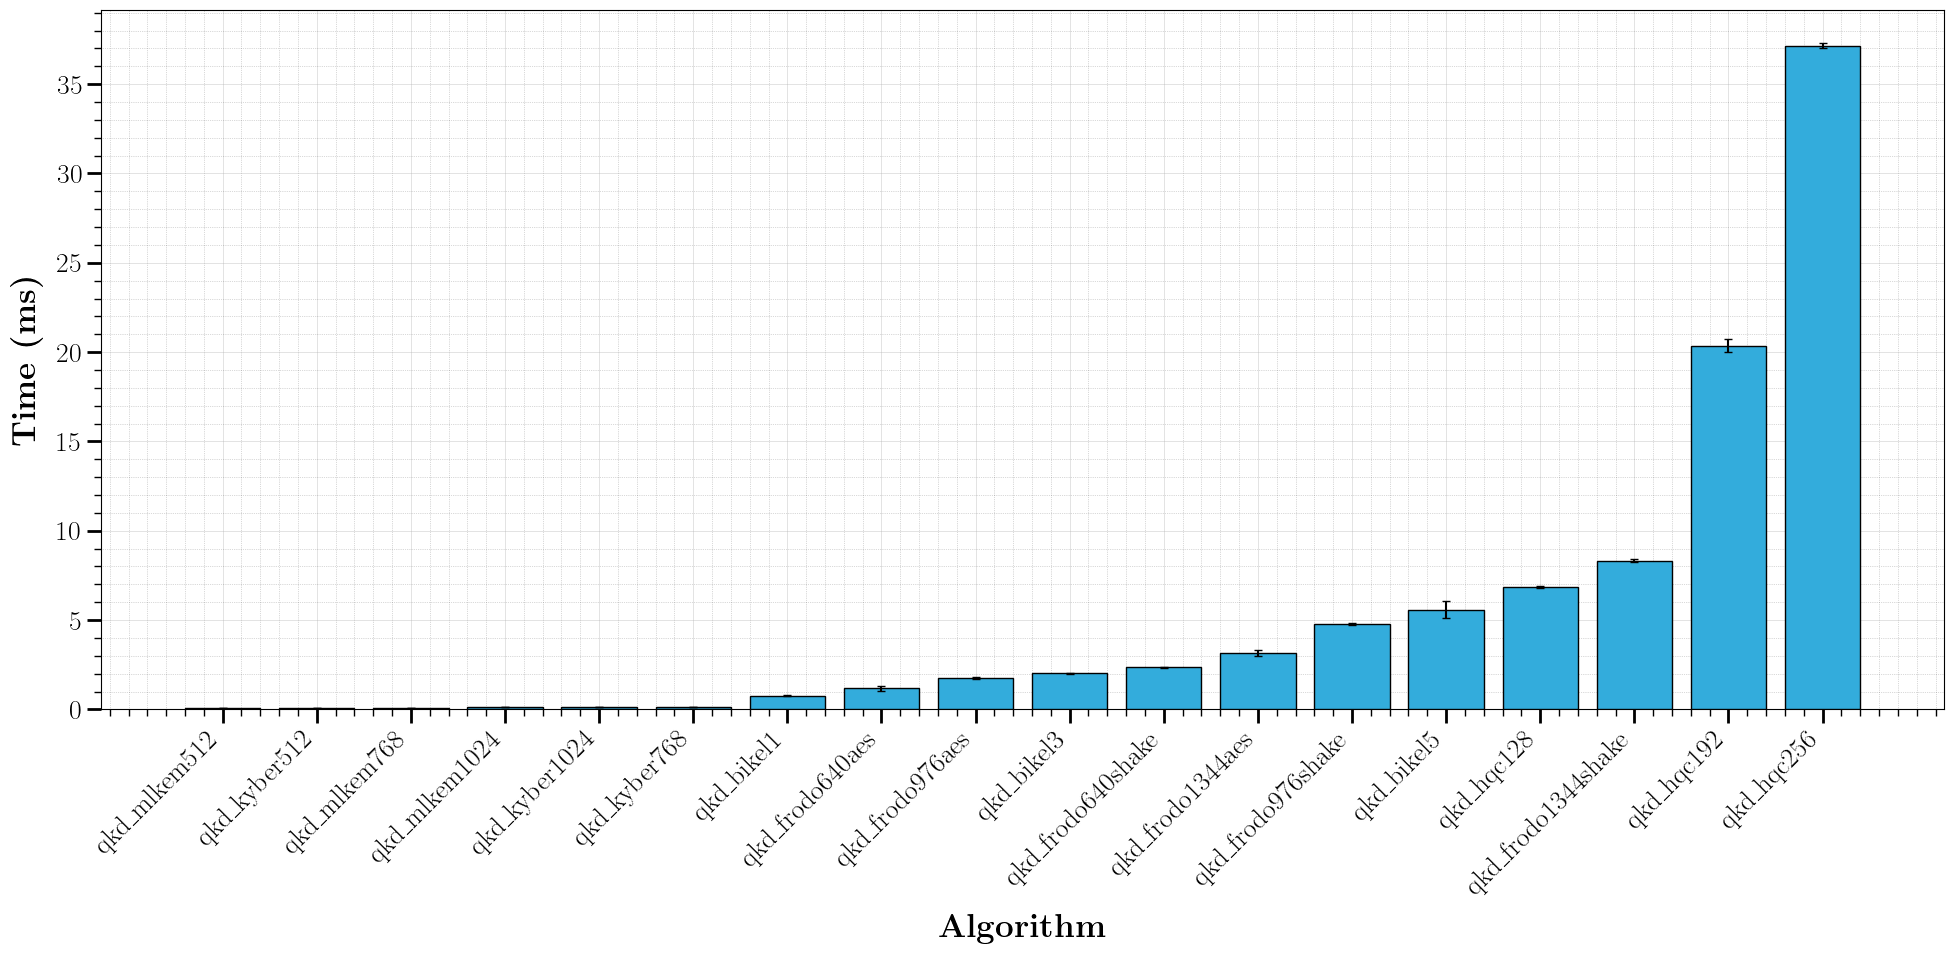

In [11]:
plot_kem_total_times(df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_total_times.pdf", y_start=None)

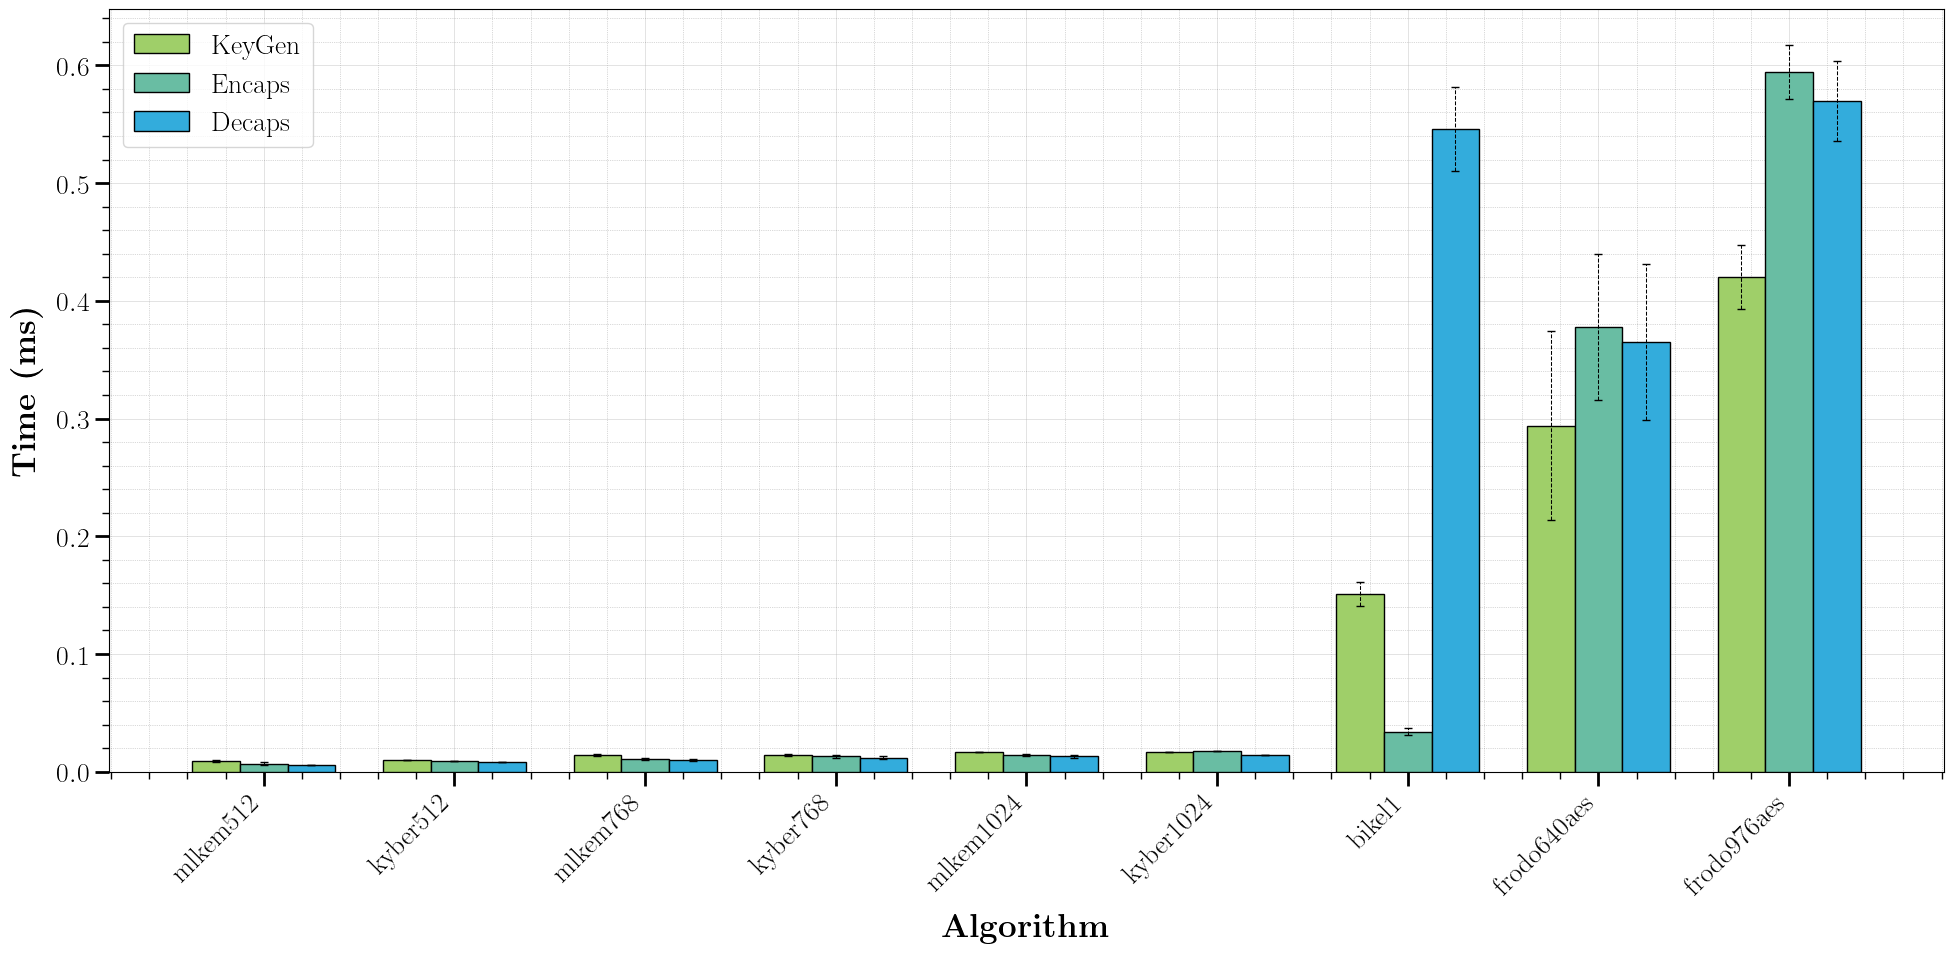

In [12]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times.pdf")

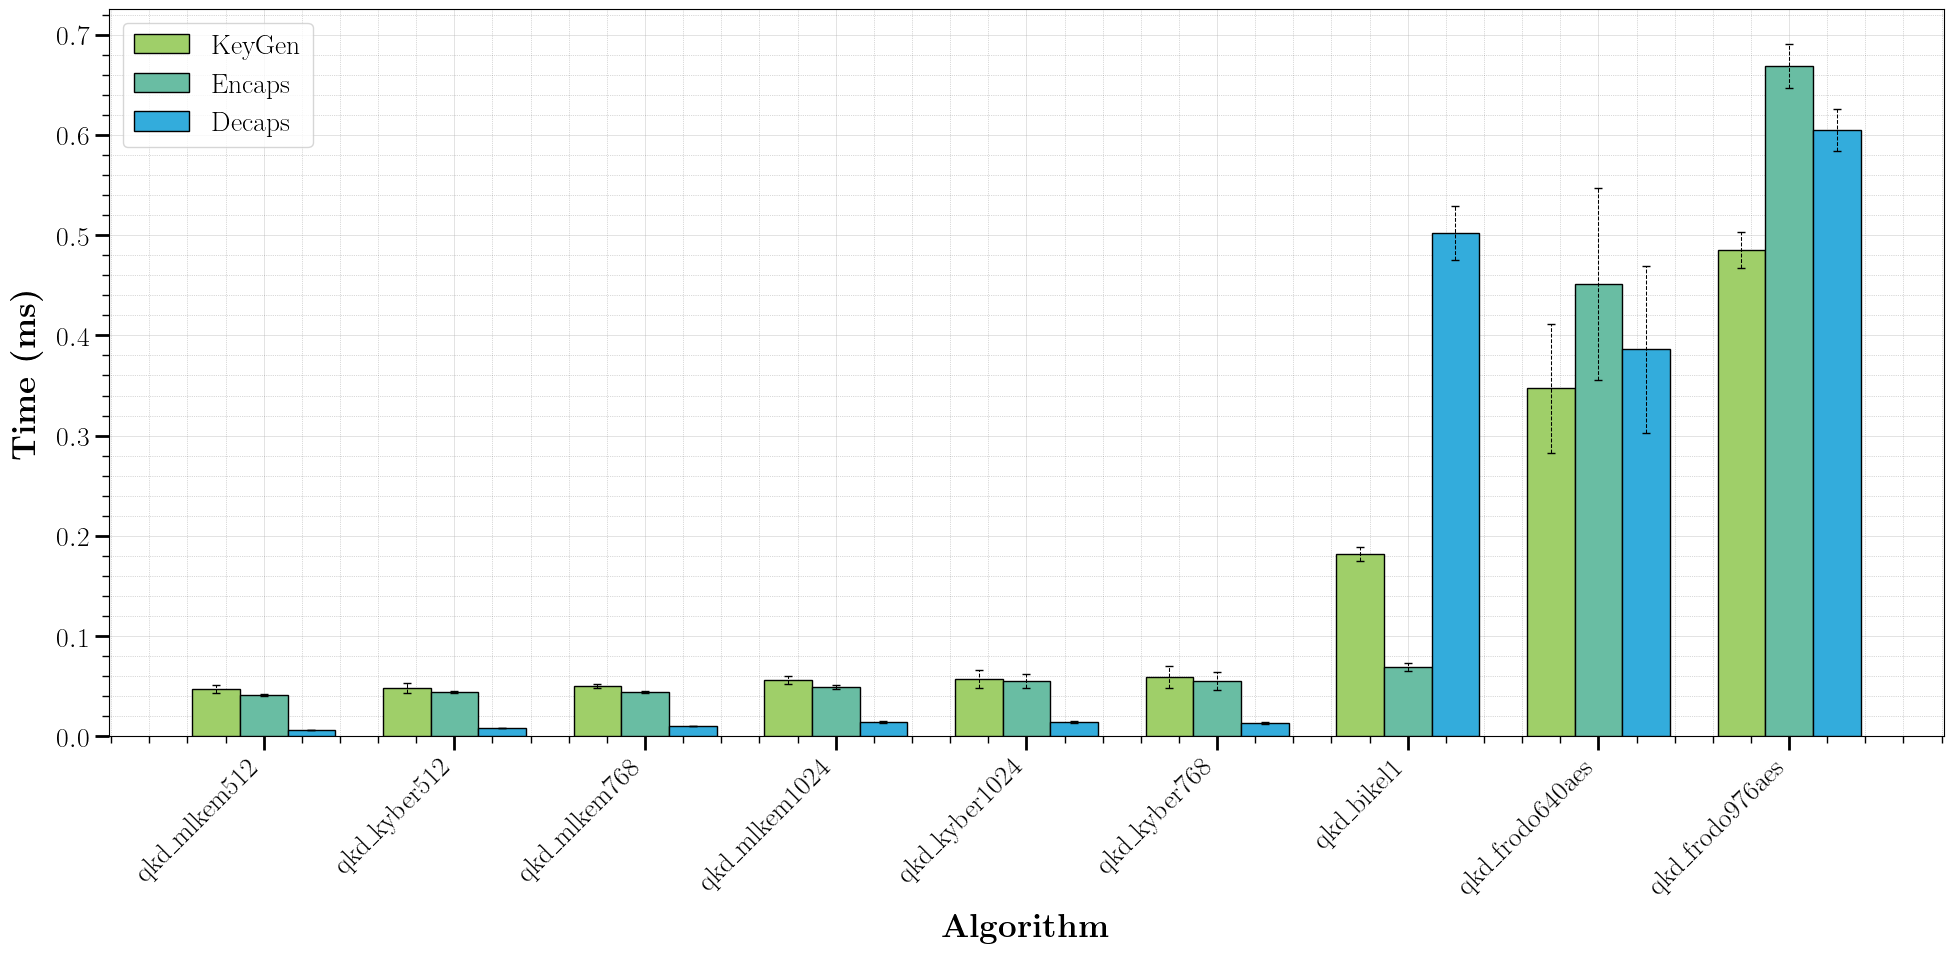

In [13]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_fast_times.pdf")

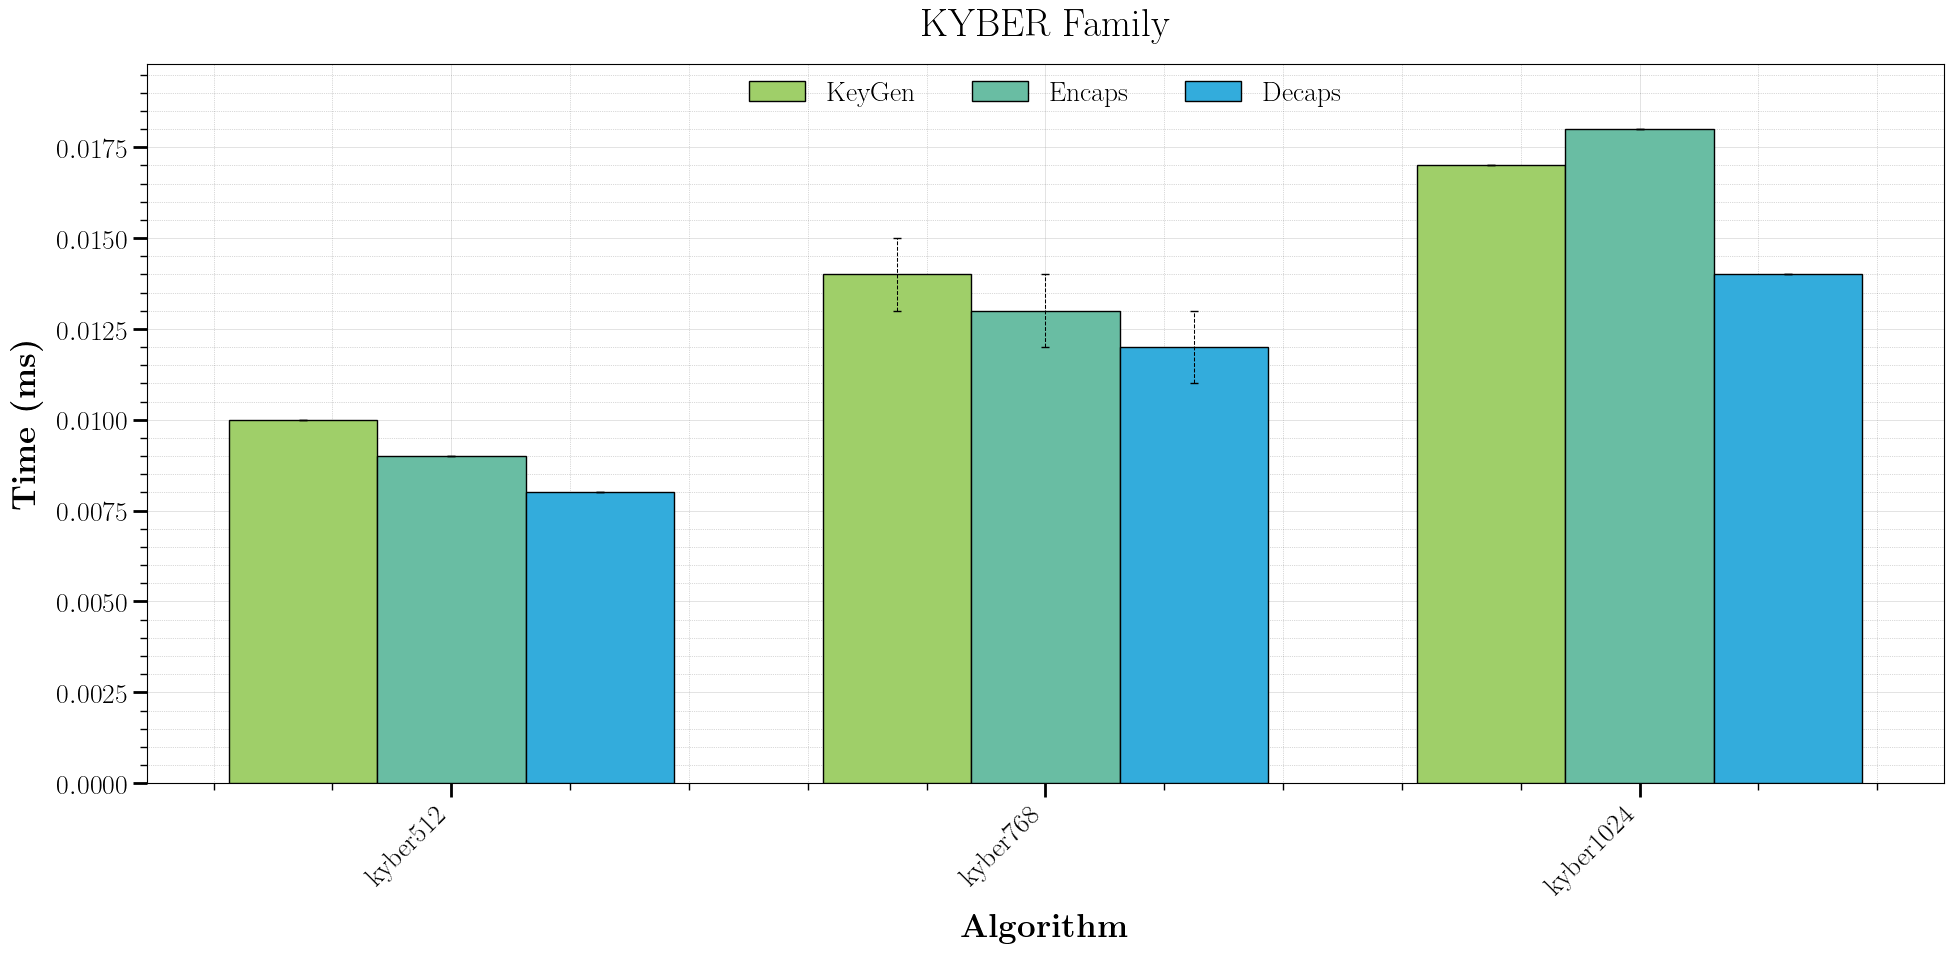

In [14]:
plot_kem_family(input_df=df_kems_stats, family='kyber', error_suffix="_std", plot_title="kyber_times.pdf", log_scale=False)

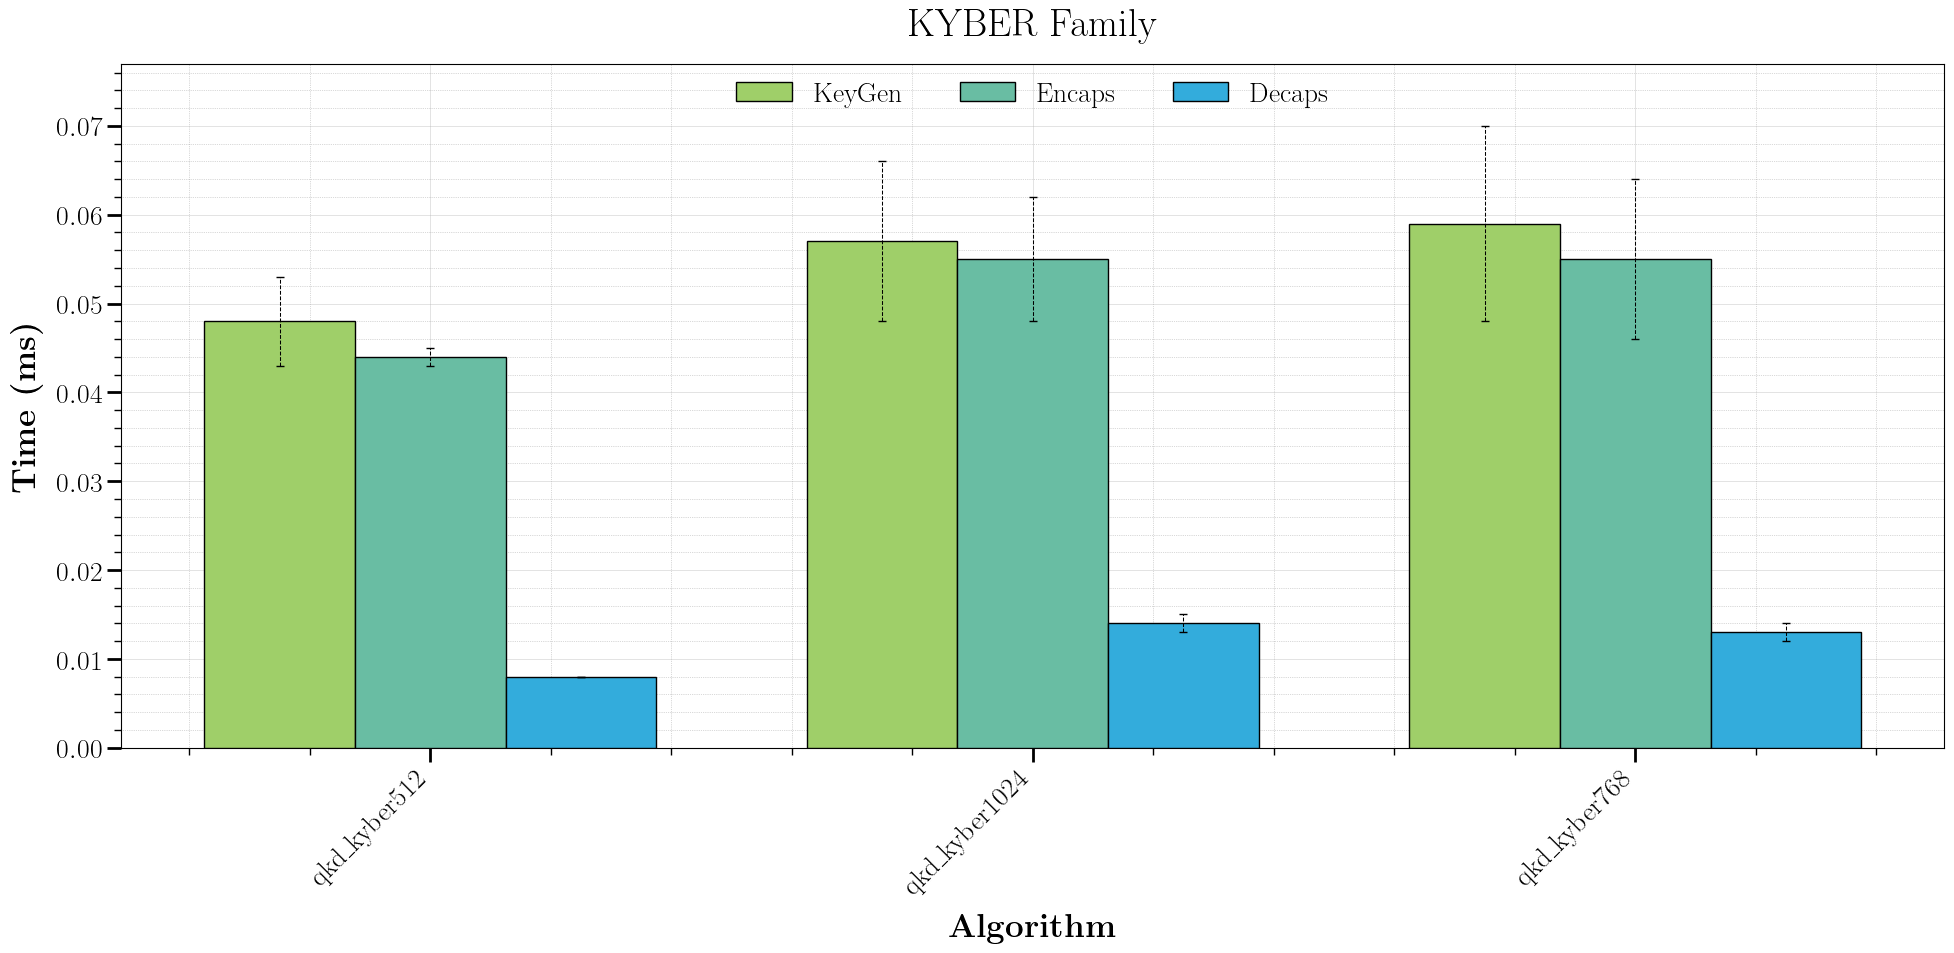

In [15]:
plot_kem_family(input_df=df_qkdkems_stats, family='kyber', error_suffix="_std", plot_title="qkdkyber_times.pdf", log_scale=False)

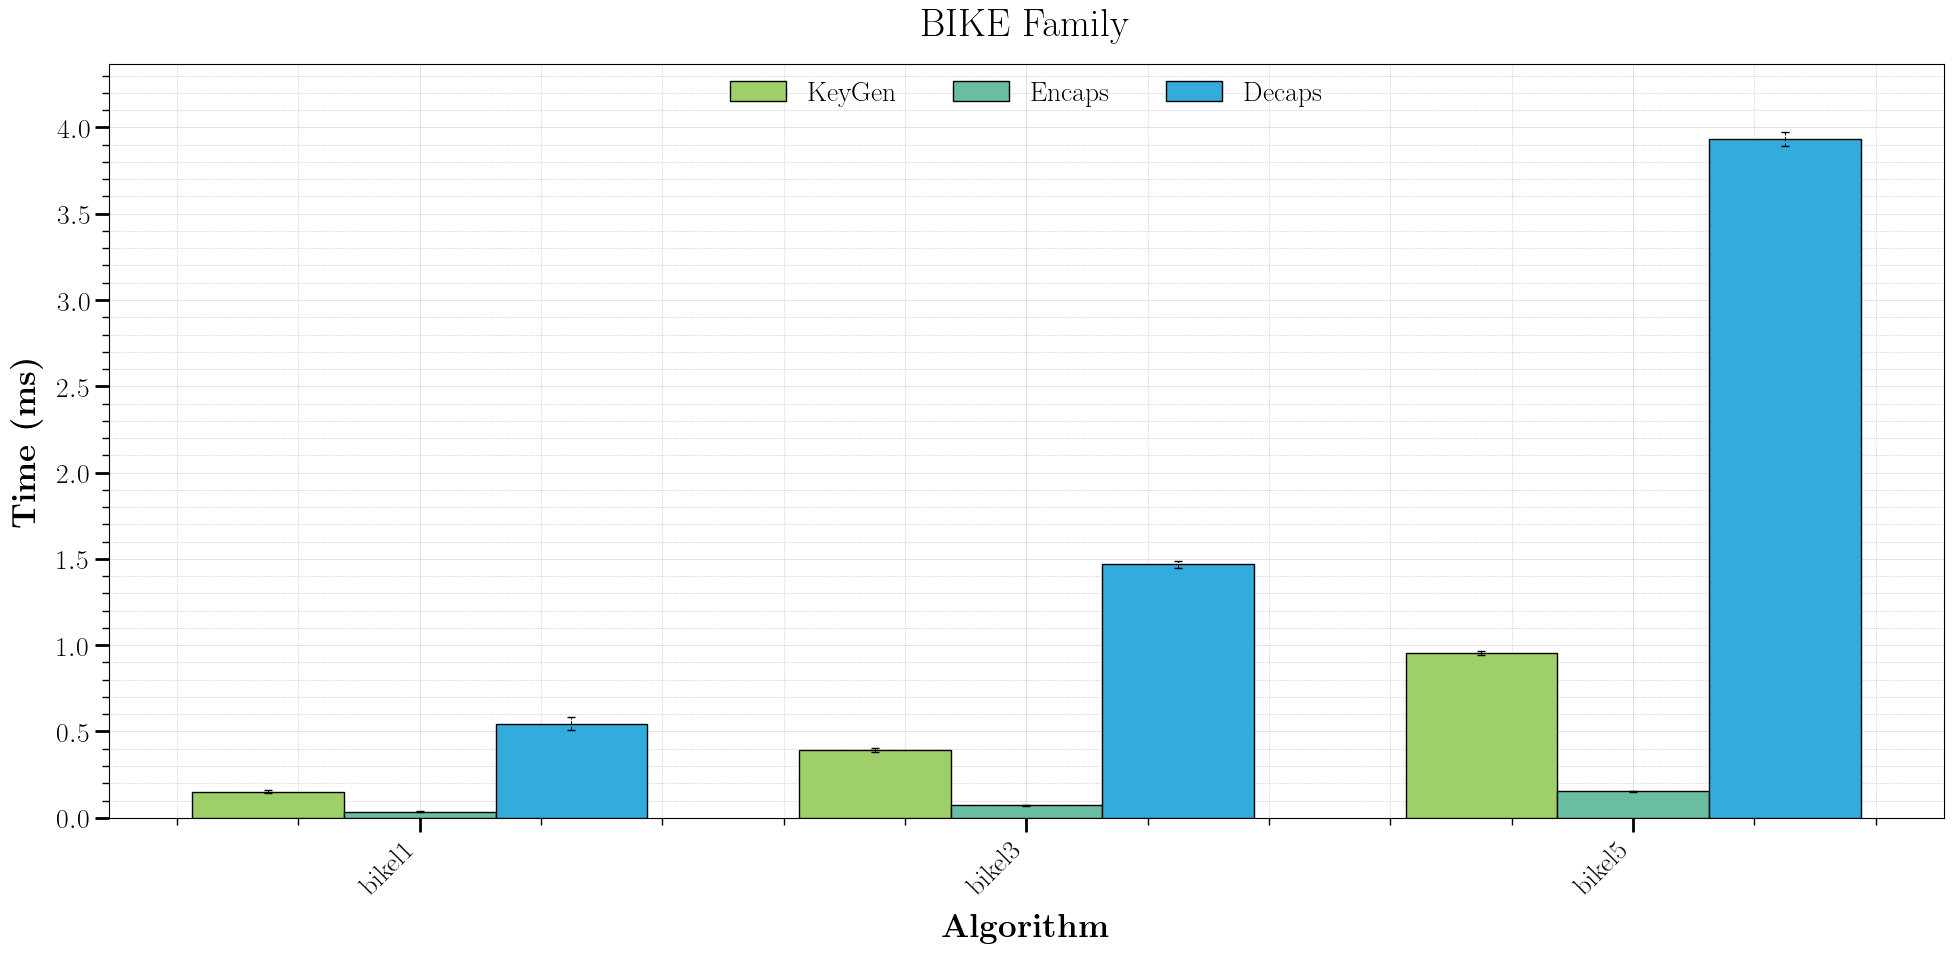

In [16]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

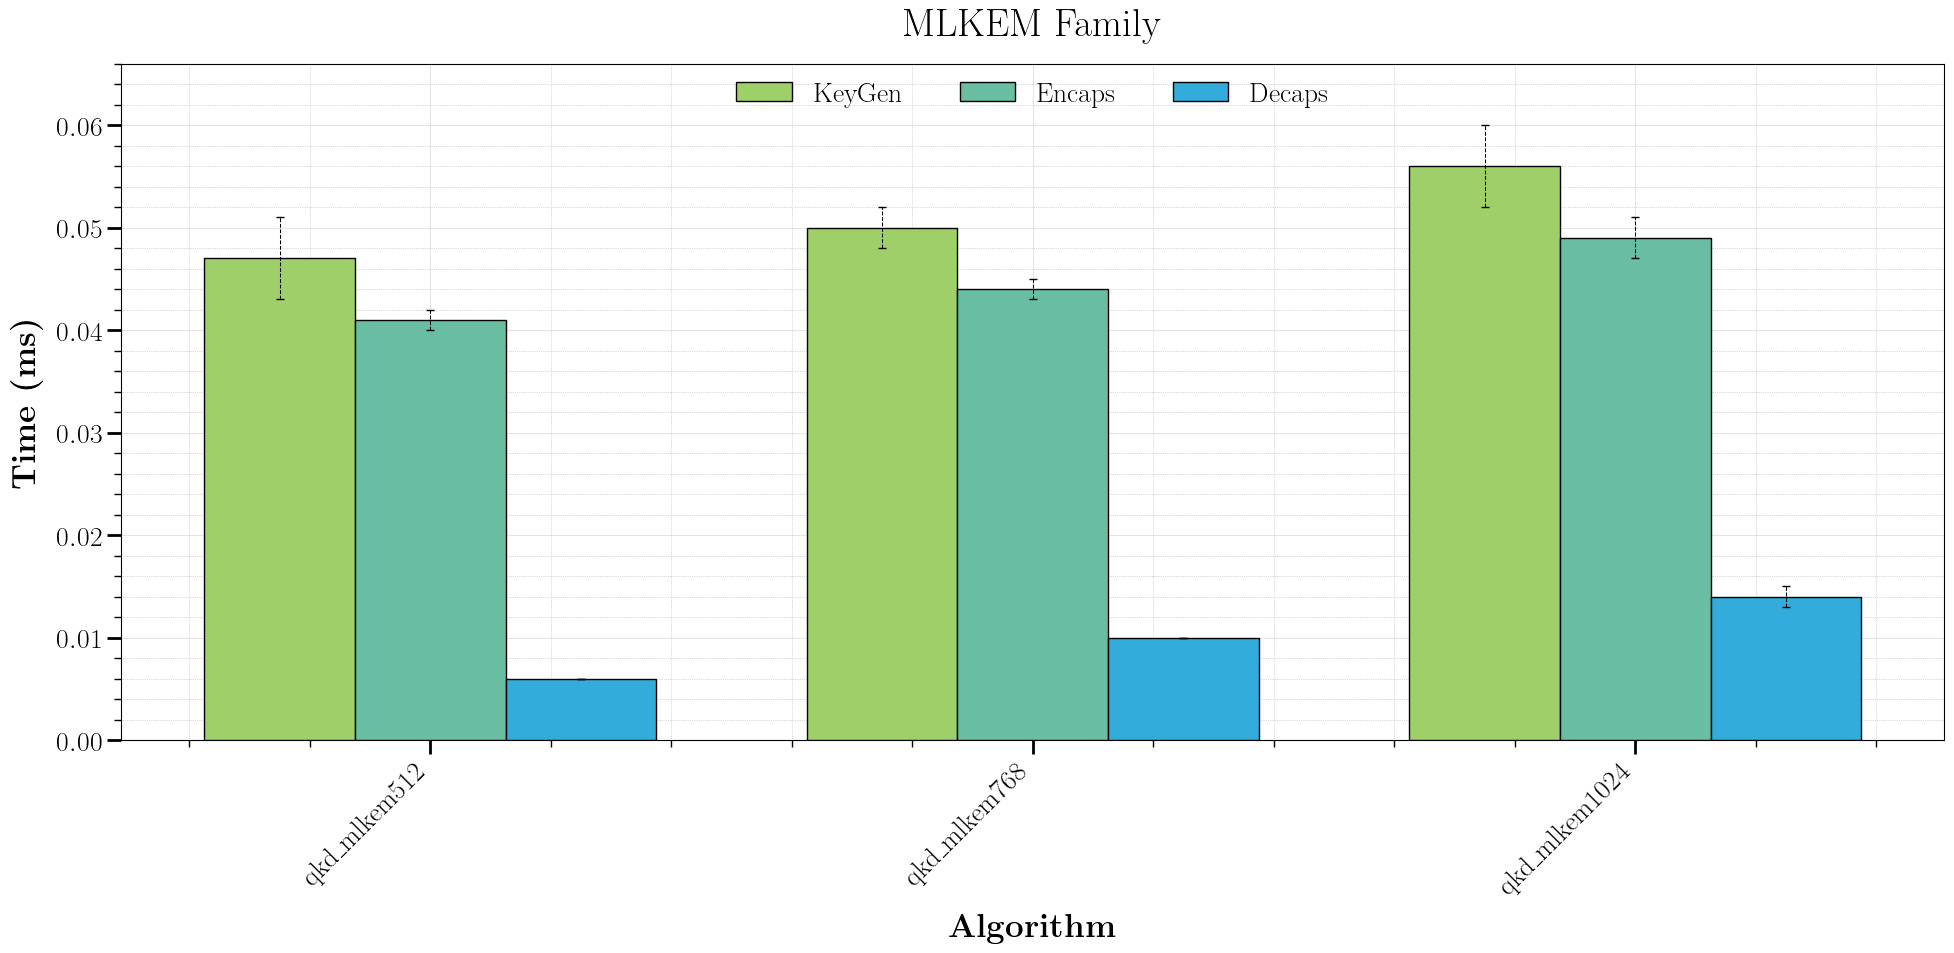

In [17]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times.pdf", log_scale=False)

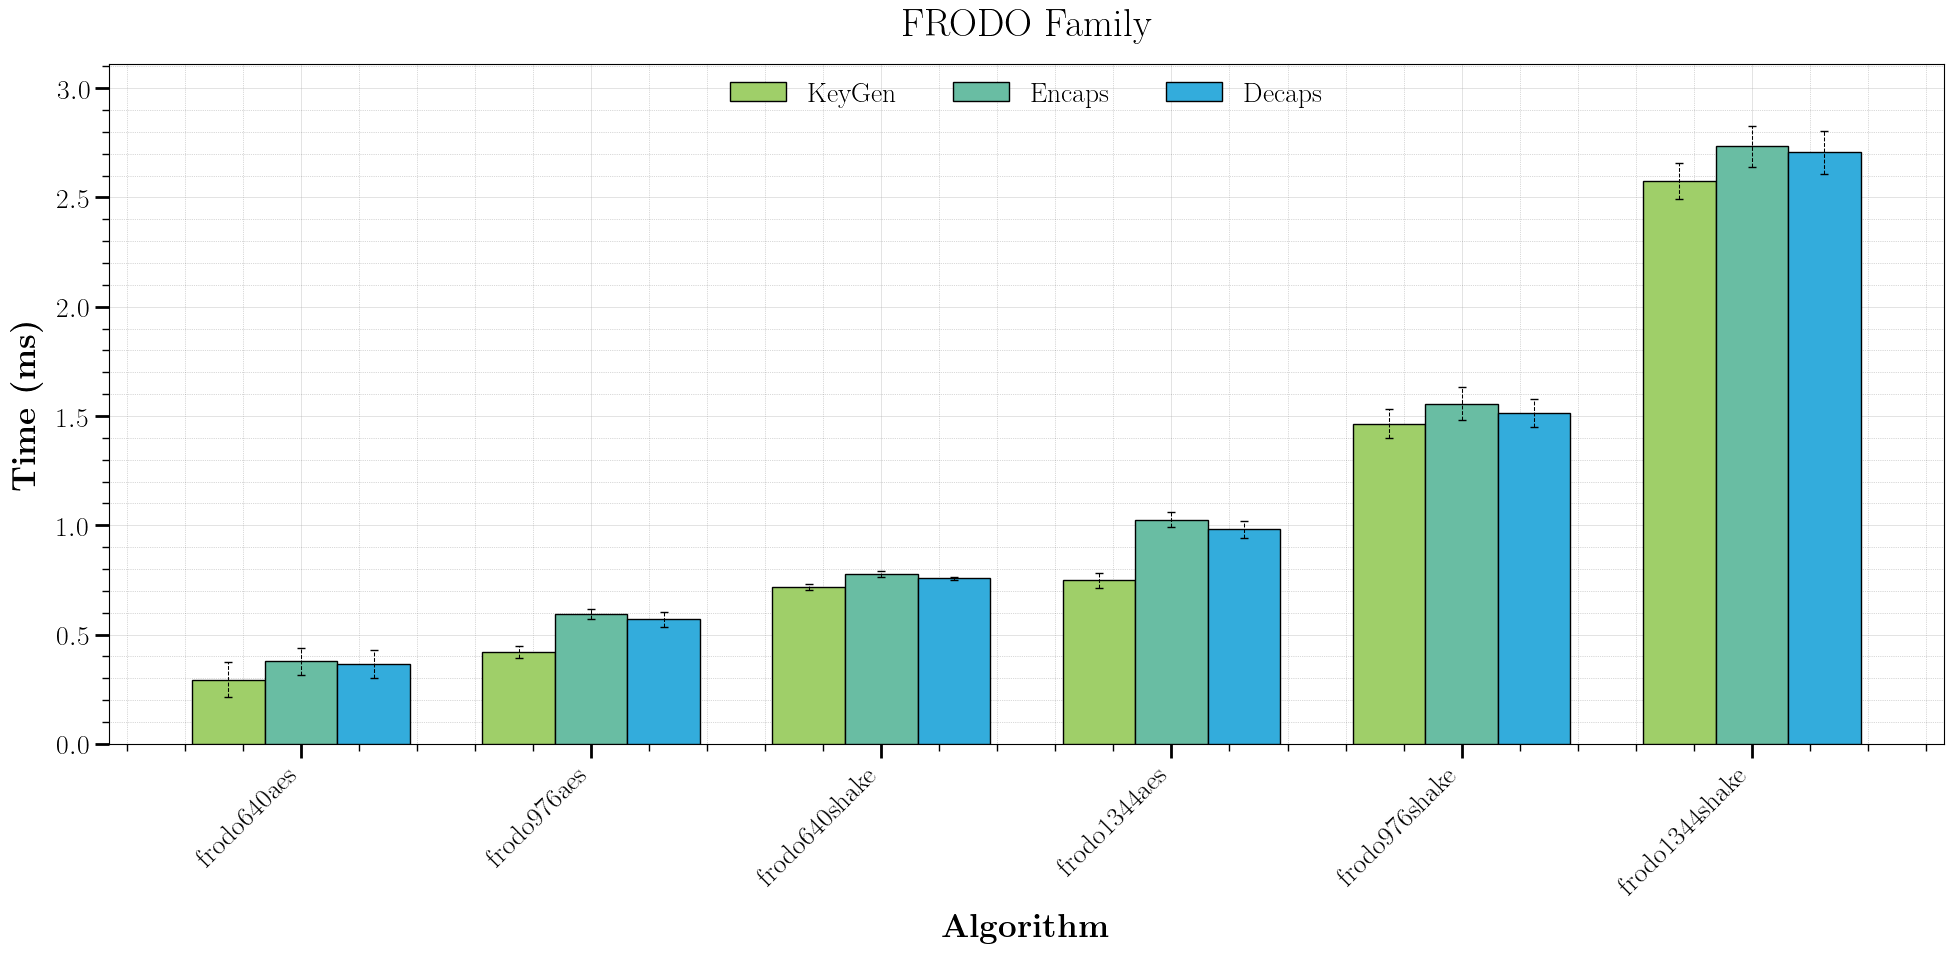

In [18]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

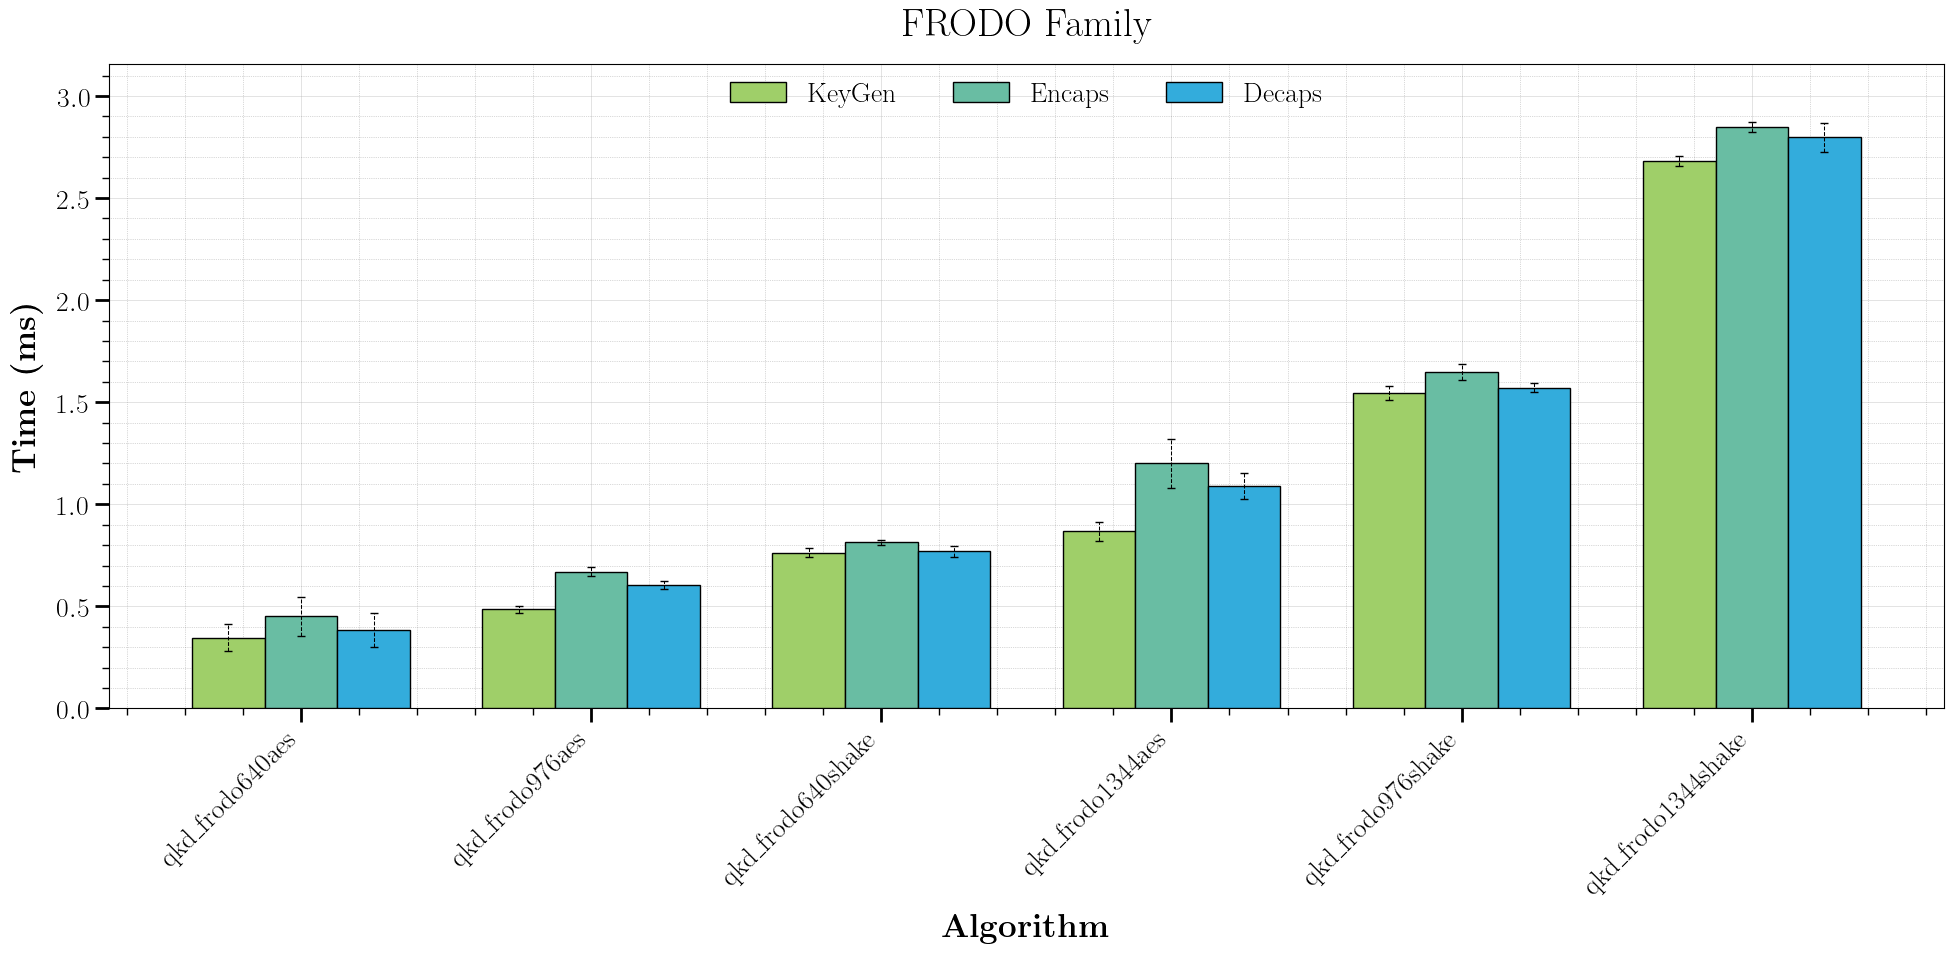

In [19]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times.pdf", log_scale=False)

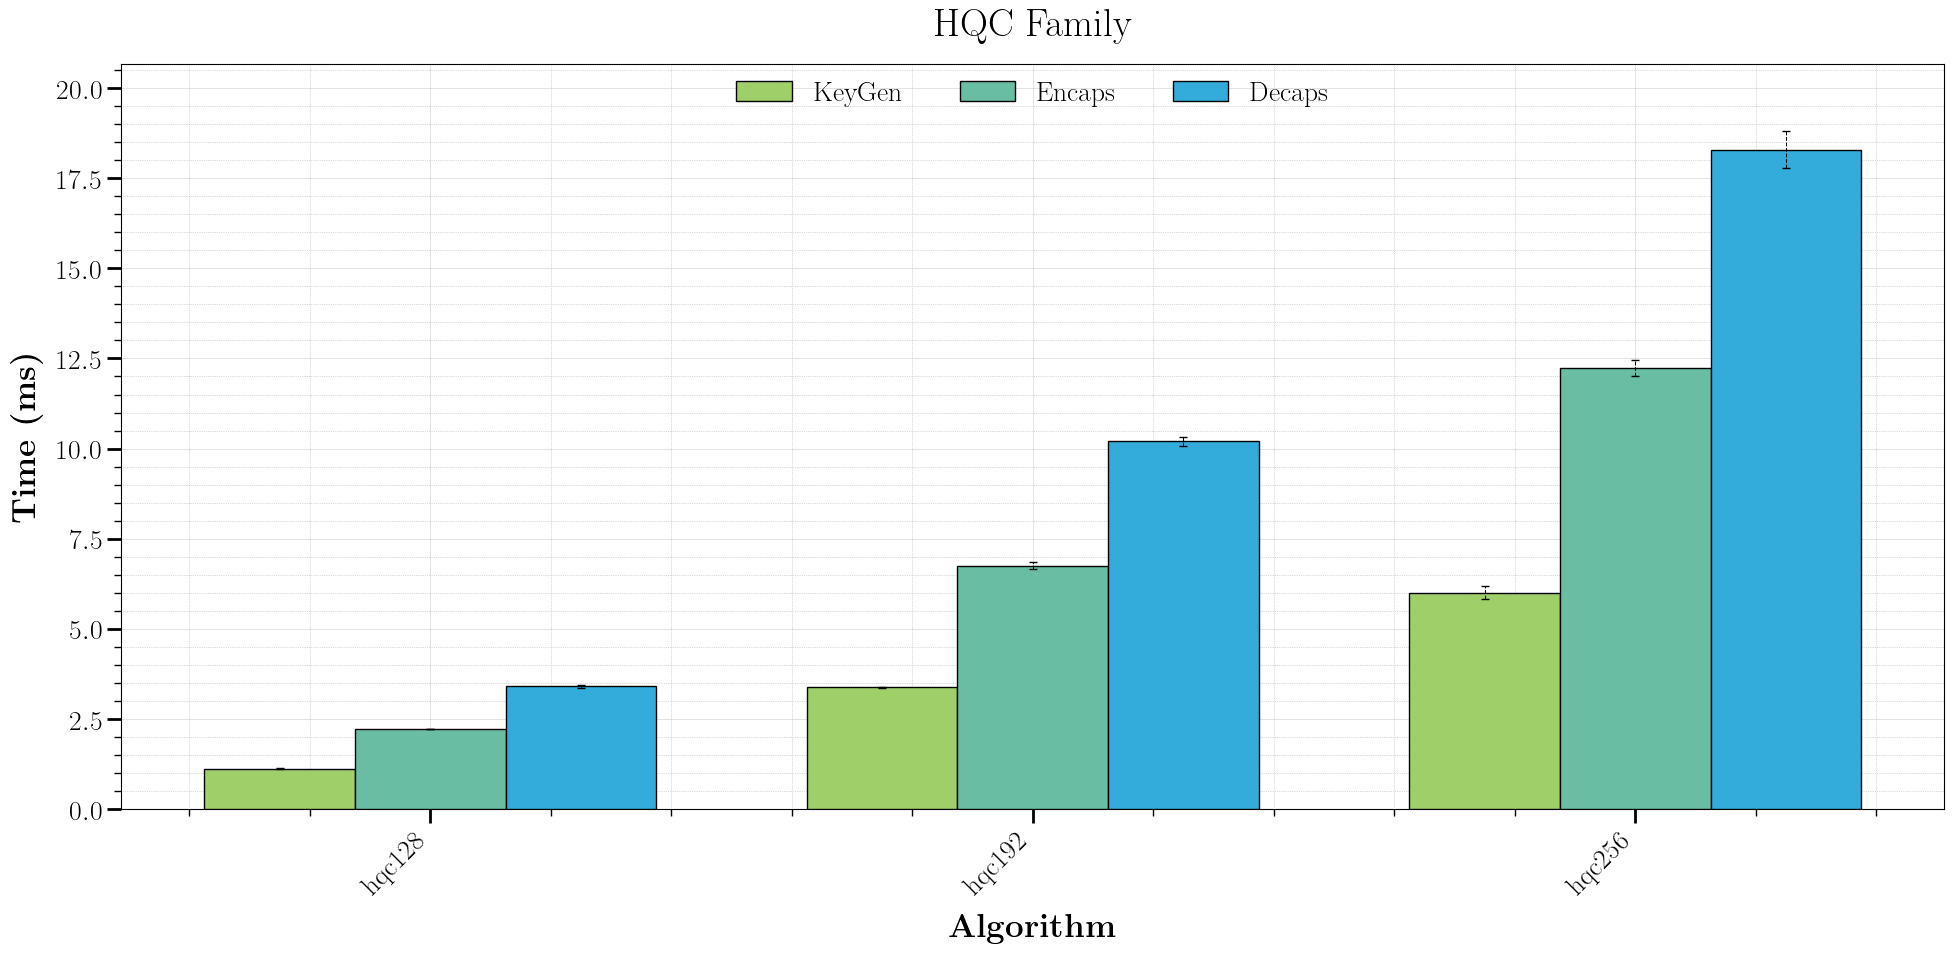

In [20]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

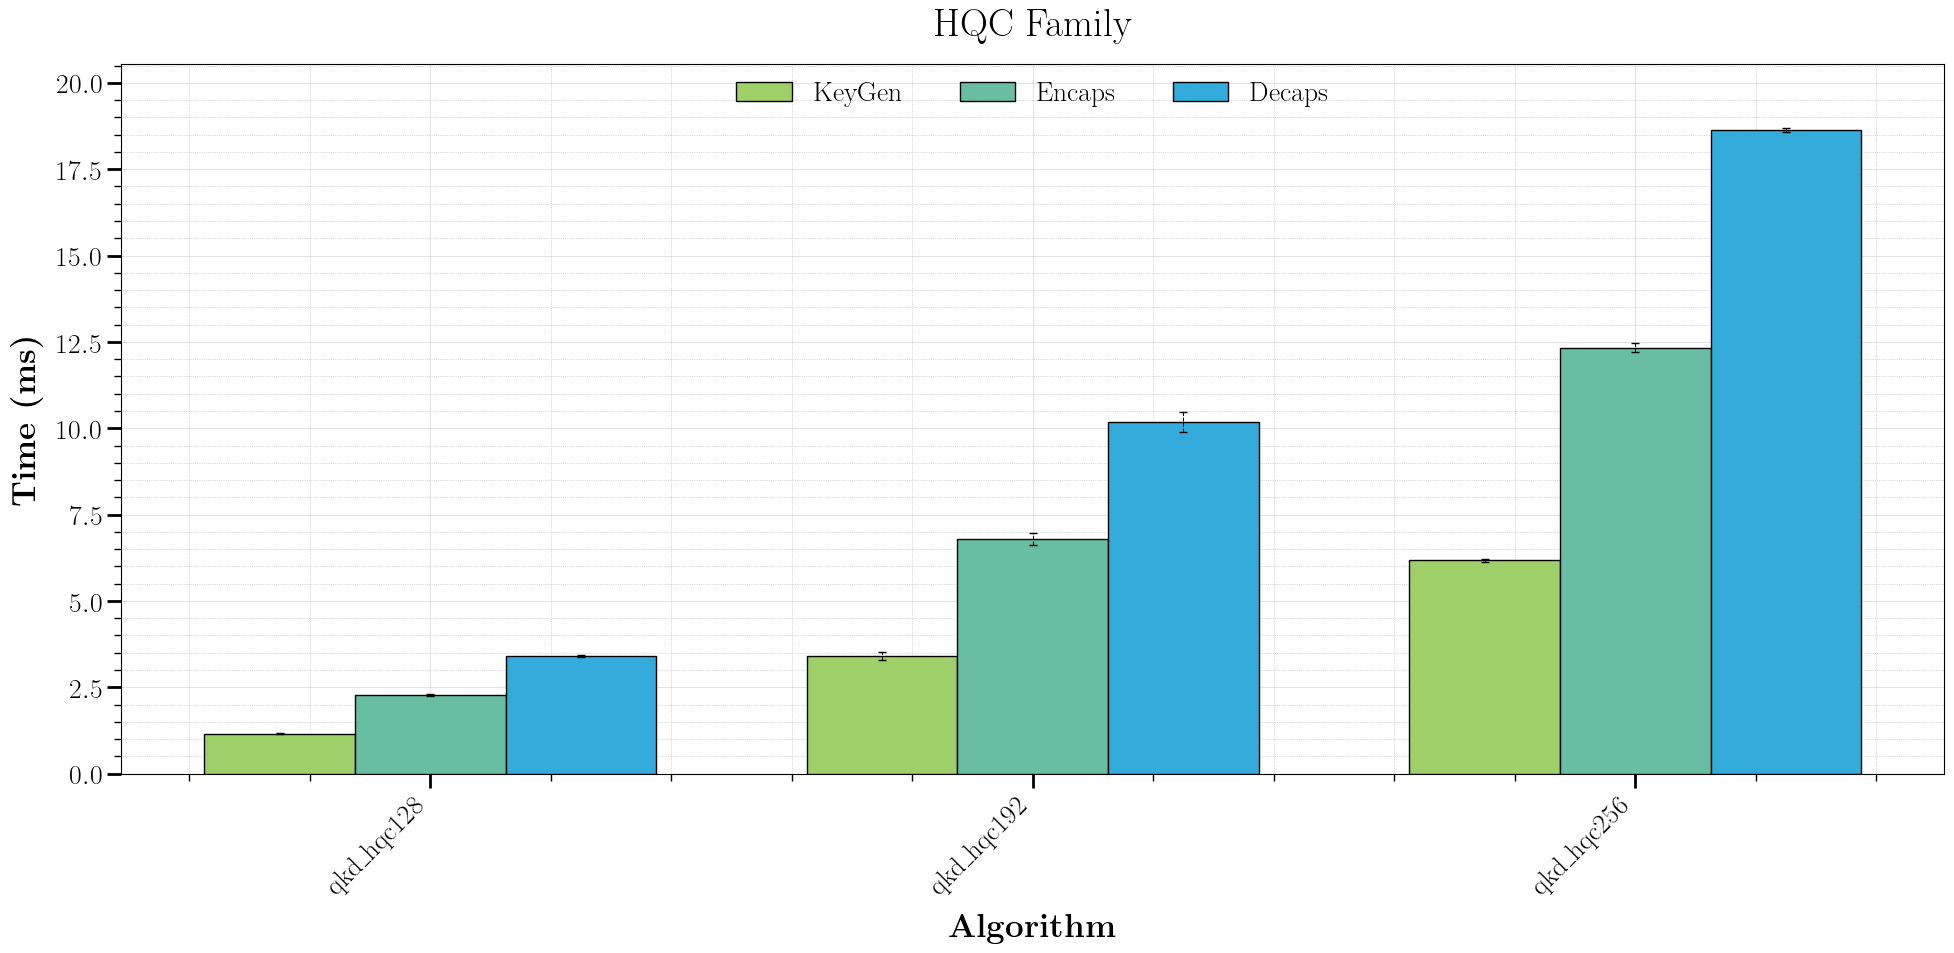

In [21]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times.pdf", log_scale=False)

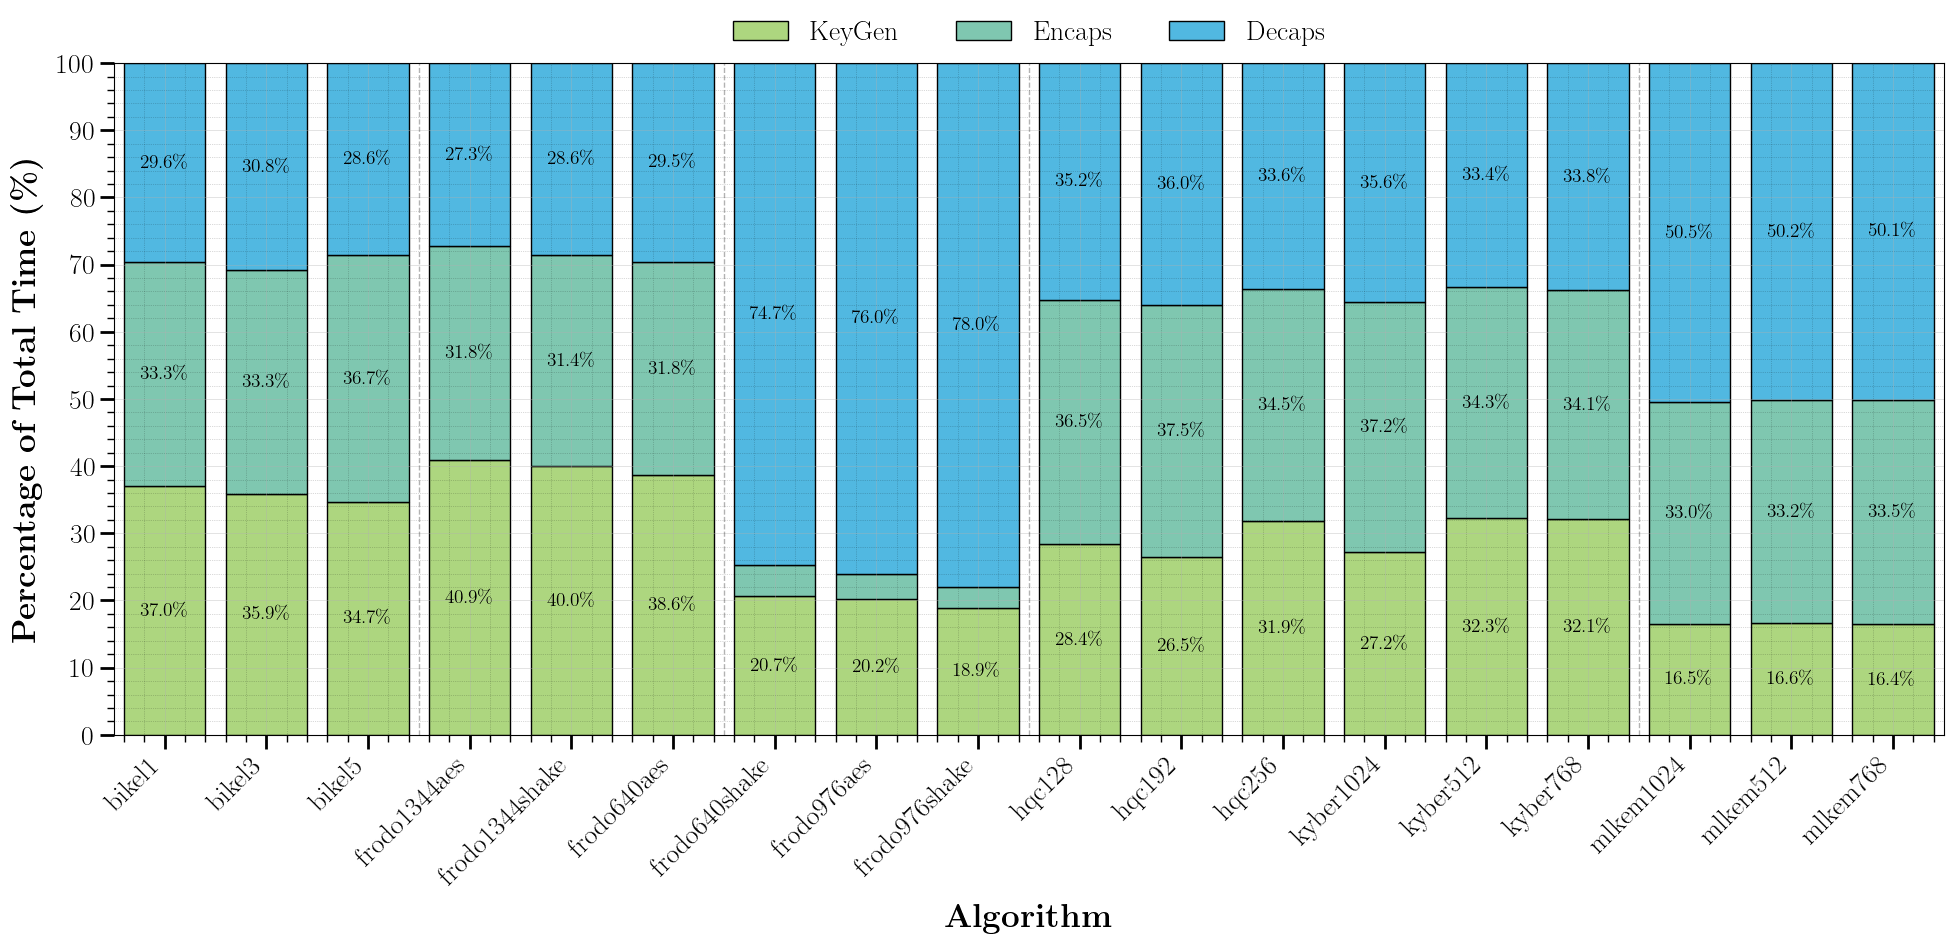

In [22]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="kems_ops_weights.pdf")

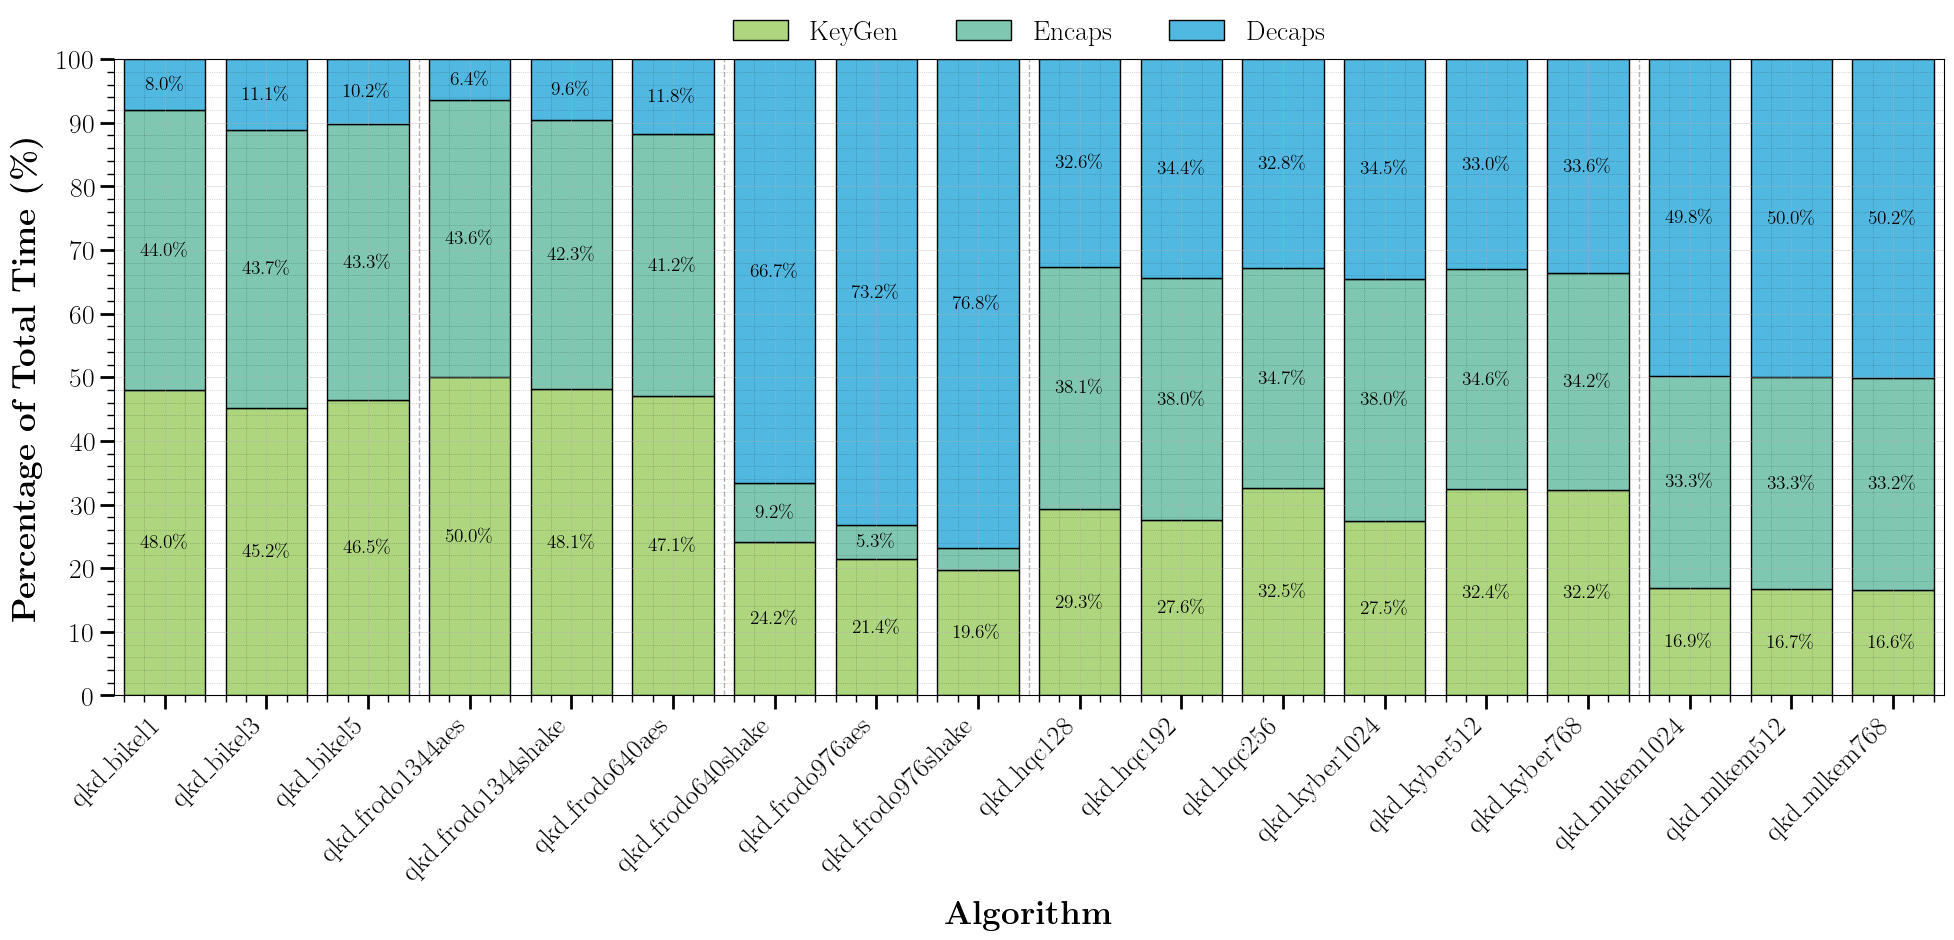

In [23]:
plot_ops_percent(input_df=df_qkdkems_stats, family=None, plot_title="qkdkems_ops_weights.pdf")

In [24]:
# Combine the DataFrames for comparison 

# Create copies to avoid modifying originals
df_std = df_kems_stats.copy()
df_qkd = df_qkdkems_stats.copy()
    
# Rename indices to match if needed
df_qkd.index = [idx.replace('qkd_', '') for idx in df_qkd.index]
    
# Concatenate and sort
comparison_stats = pd.concat([df_std, df_qkd], 
                            keys=['Standard', 'QKD'],
                            names=['Variant', 'Algorithm'])

comparison_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Variant  Algorithm                                                        
Standard bikel1                     18            0.151           0.010   
         bikel3                     18            0.391           0.012   
         bikel5                     18            0.955           0.009   
         frodo1344aes               18            0.748           0.035   
         frodo1344shake             18            2.576           0.083   
         frodo640aes                18            0.294           0.080   
         frodo640shake              18            0.718           0.014   
         frodo976aes                18            0.420           0.027   
         frodo976shake              18            1.464           0.067   
         hqc128                     18            1.116           0.014   
         hqc192                     18            3.381           0.013   
         hqc256                     18            6.003           0.186   
         kyber1024                  18            0.017           0.000   
         kyber512                   18            0.010           0.000   
         kyber768                   18            0.014           0.001   
         mlkem1024                  18            0.017           0.000   
         mlkem512                   18            0.009           0.001   
         mlkem768                   18            0.014           0.001   
QKD      bikel1                     18            0.182           0.007   
         bikel3                     18            0.433           0.016   
         bikel5                     18            1.097           0.161   
         frodo1344aes               18            0.868           0.047   
         frodo1344shake             18            2.682           0.024   
         frodo640aes                18            0.347           0.064   
         frodo640shake              18            0.763           0.021   
         frodo976aes                18            0.485           0.018   
         frodo976shake              18            1.544           0.034   
         hqc128                     18            1.158           0.015   
         hqc192                     18            3.407           0.105   
         hqc256                     18            6.179           0.049   
         kyber1024                  18            0.057           0.009   
         kyber512                   18            0.048           0.005   
         kyber768                   18            0.059           0.011   
         mlkem1024                  18            0.056           0.004   
         mlkem512                   18            0.047           0.004   
         mlkem768                   18            0.050           0.002   

                         KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Variant  Algorithm                                                         
Standard bikel1                   0.143           0.174            0.034   
         bikel3                   0.381           0.418            0.073   
         bikel5                   0.947           0.988            0.153   
         frodo1344aes             0.712           0.833            1.025   
         frodo1344shake           2.445           2.668            2.735   
         frodo640aes              0.243           0.570            0.378   
         frodo640shake            0.706           0.755            0.776   
         frodo976aes              0.402           0.509            0.594   
         frodo976shake            1.374           1.607            1.557   
         hqc128                   1.108           1.170            2.224   
         hqc192                   3.373           3.425            6.754   
         hqc256                   5.733           6.195           12.233   
         kyber1024                0.017           0.018            0.018   
         kyber512                 

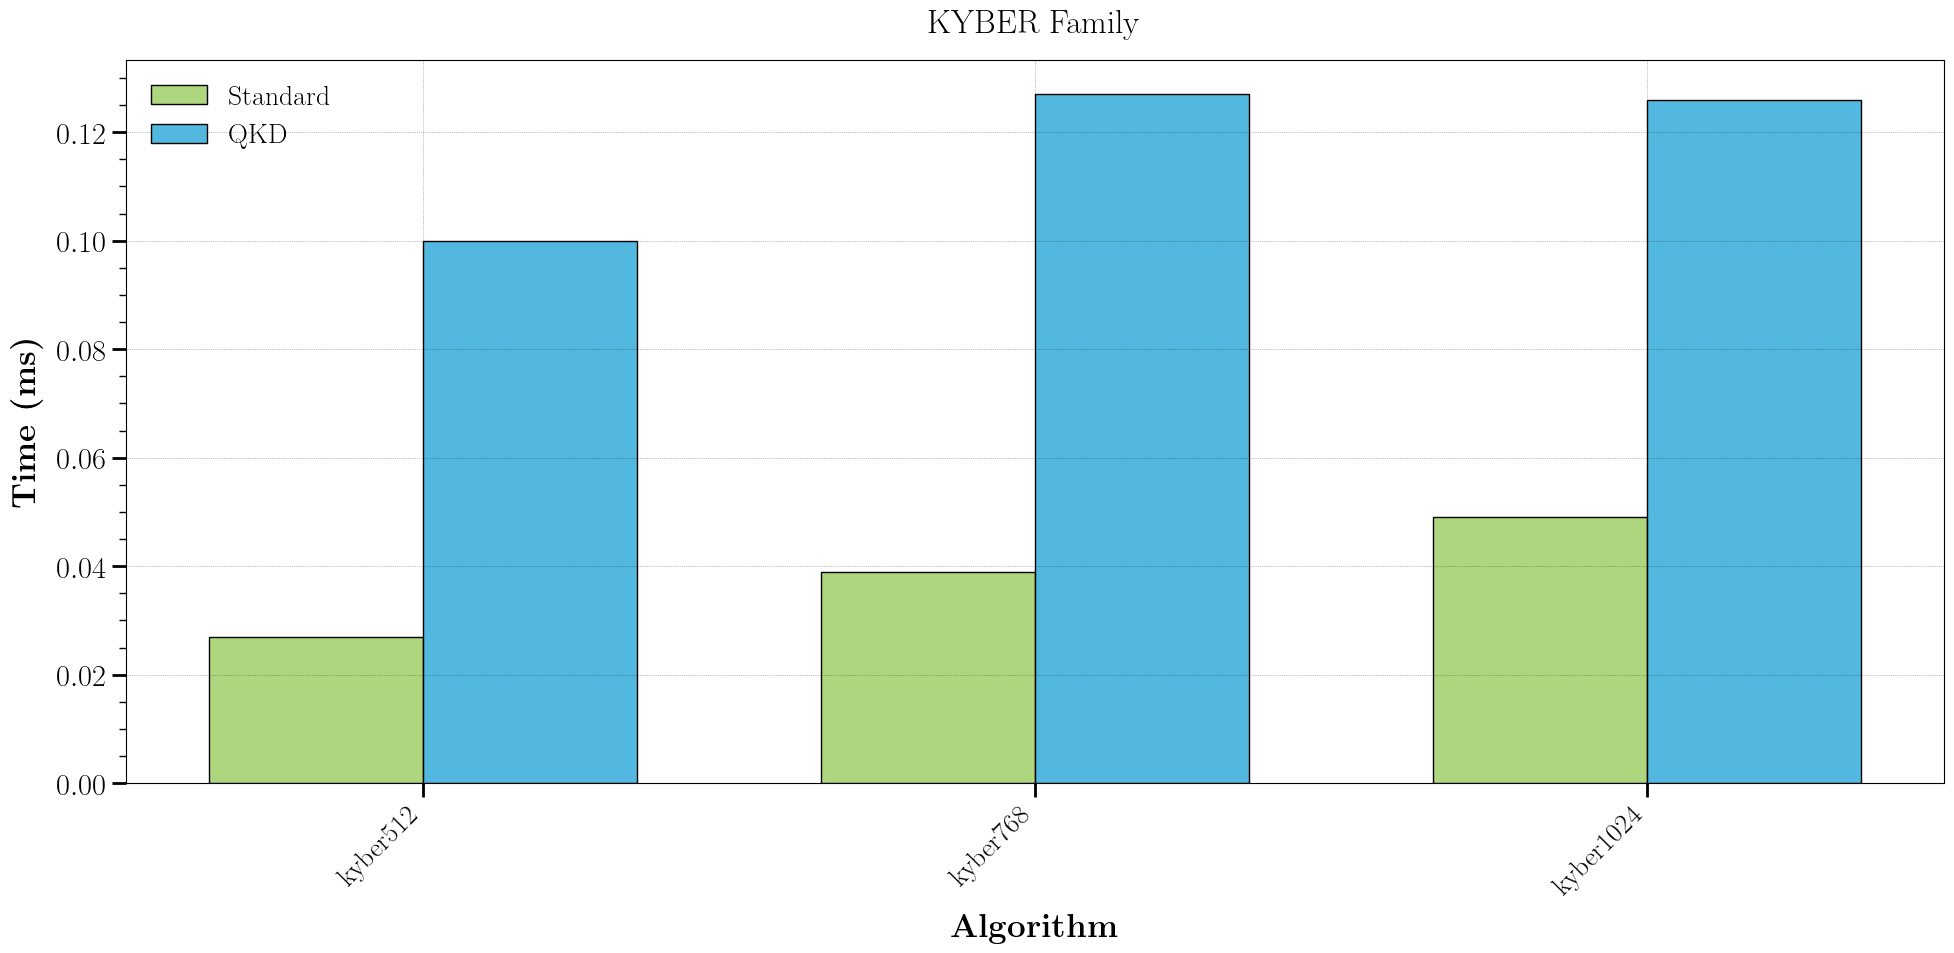

In [25]:
plot_kem_comparison(comparison_stats=comparison_stats, family="kyber", operation='TotalTime', plot_title="kyber_comparison.pdf")

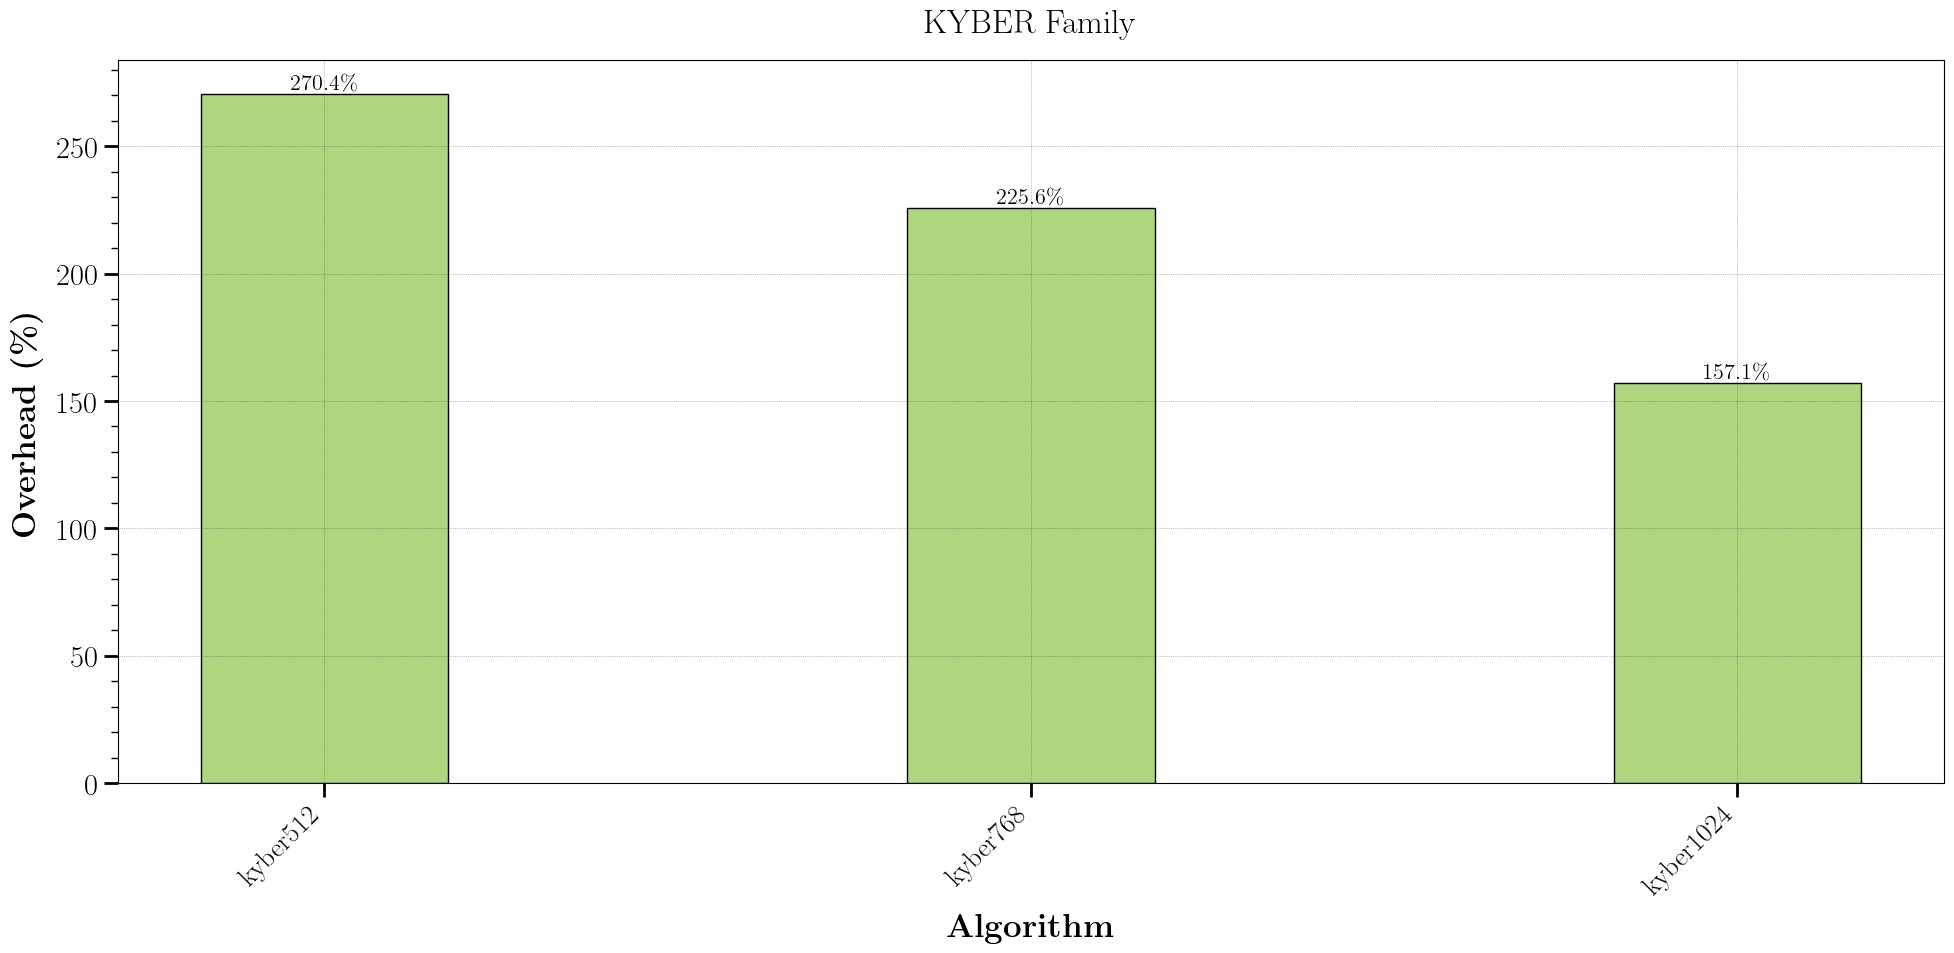

In [27]:
plot_kem_comparison(comparison_stats=comparison_stats, family="kyber", operation='TotalTime', overhead=True, plot_title="kyber_comparison_overhead.pdf")

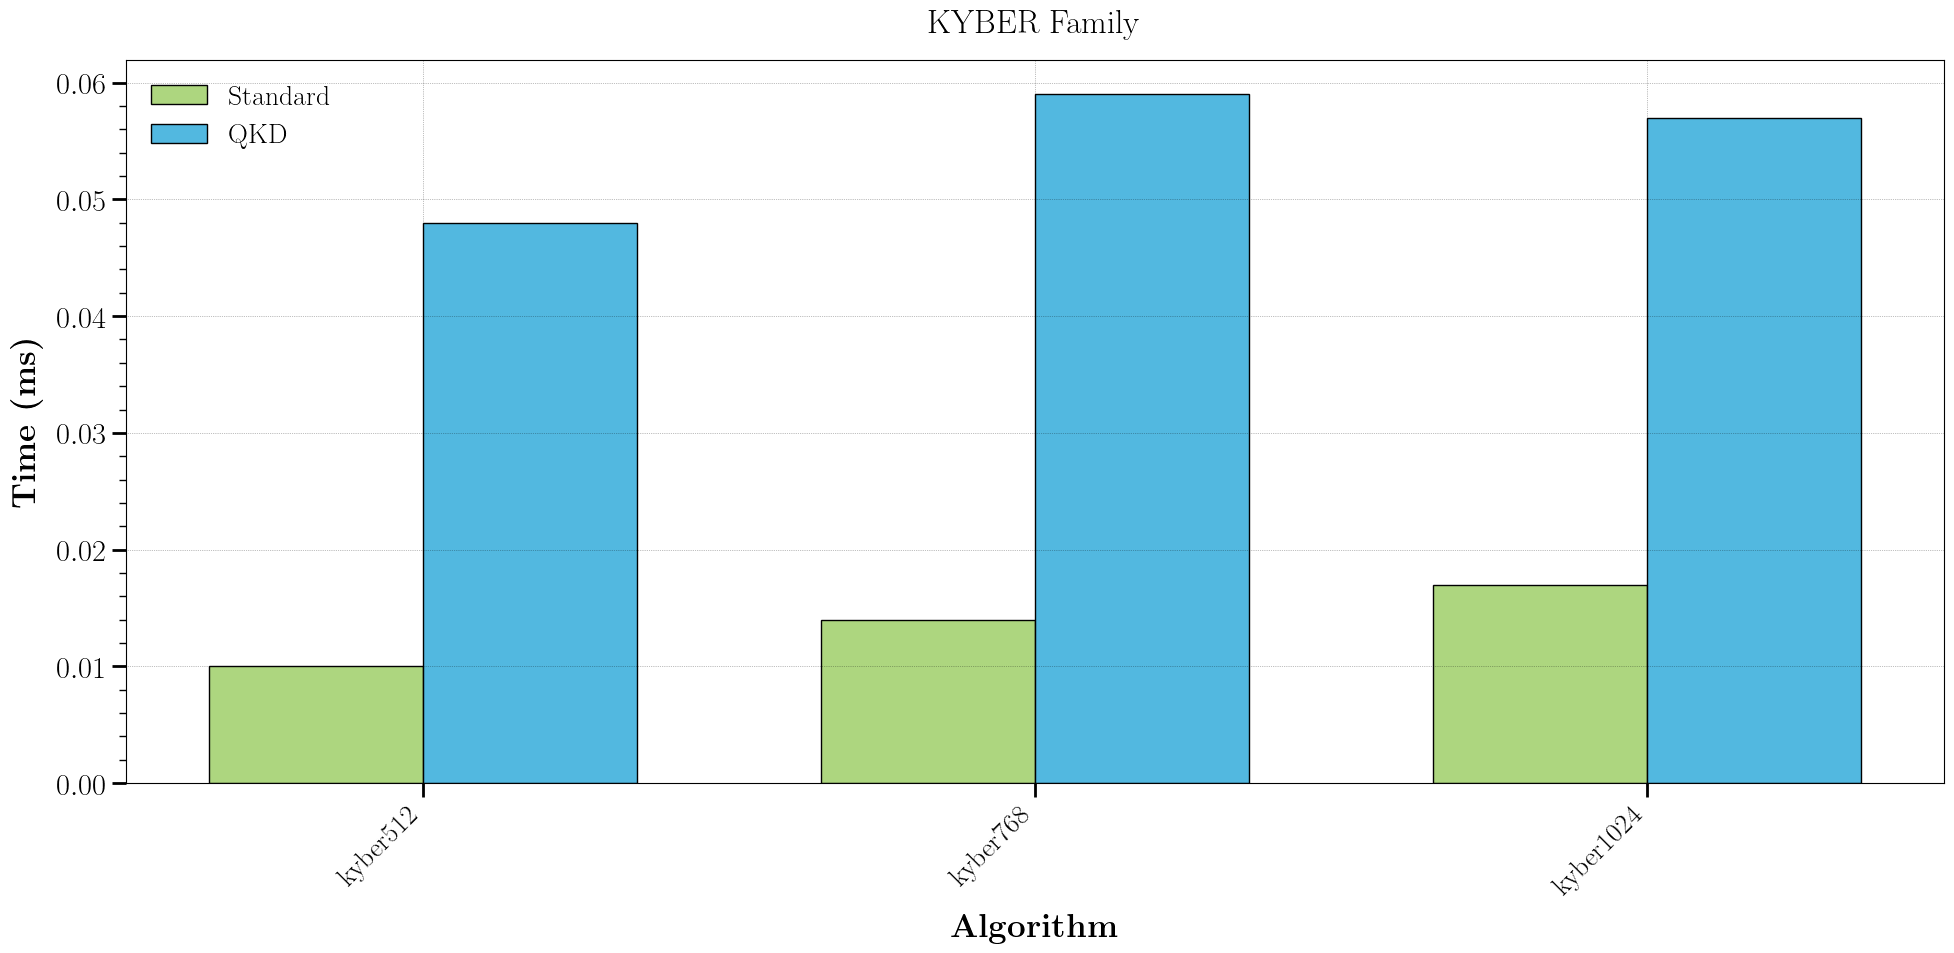

In [28]:
plot_kem_comparison(comparison_stats=comparison_stats, family="kyber", operation='KeyGen(ms)', plot_title="kyber_comparison_keygen.pdf")

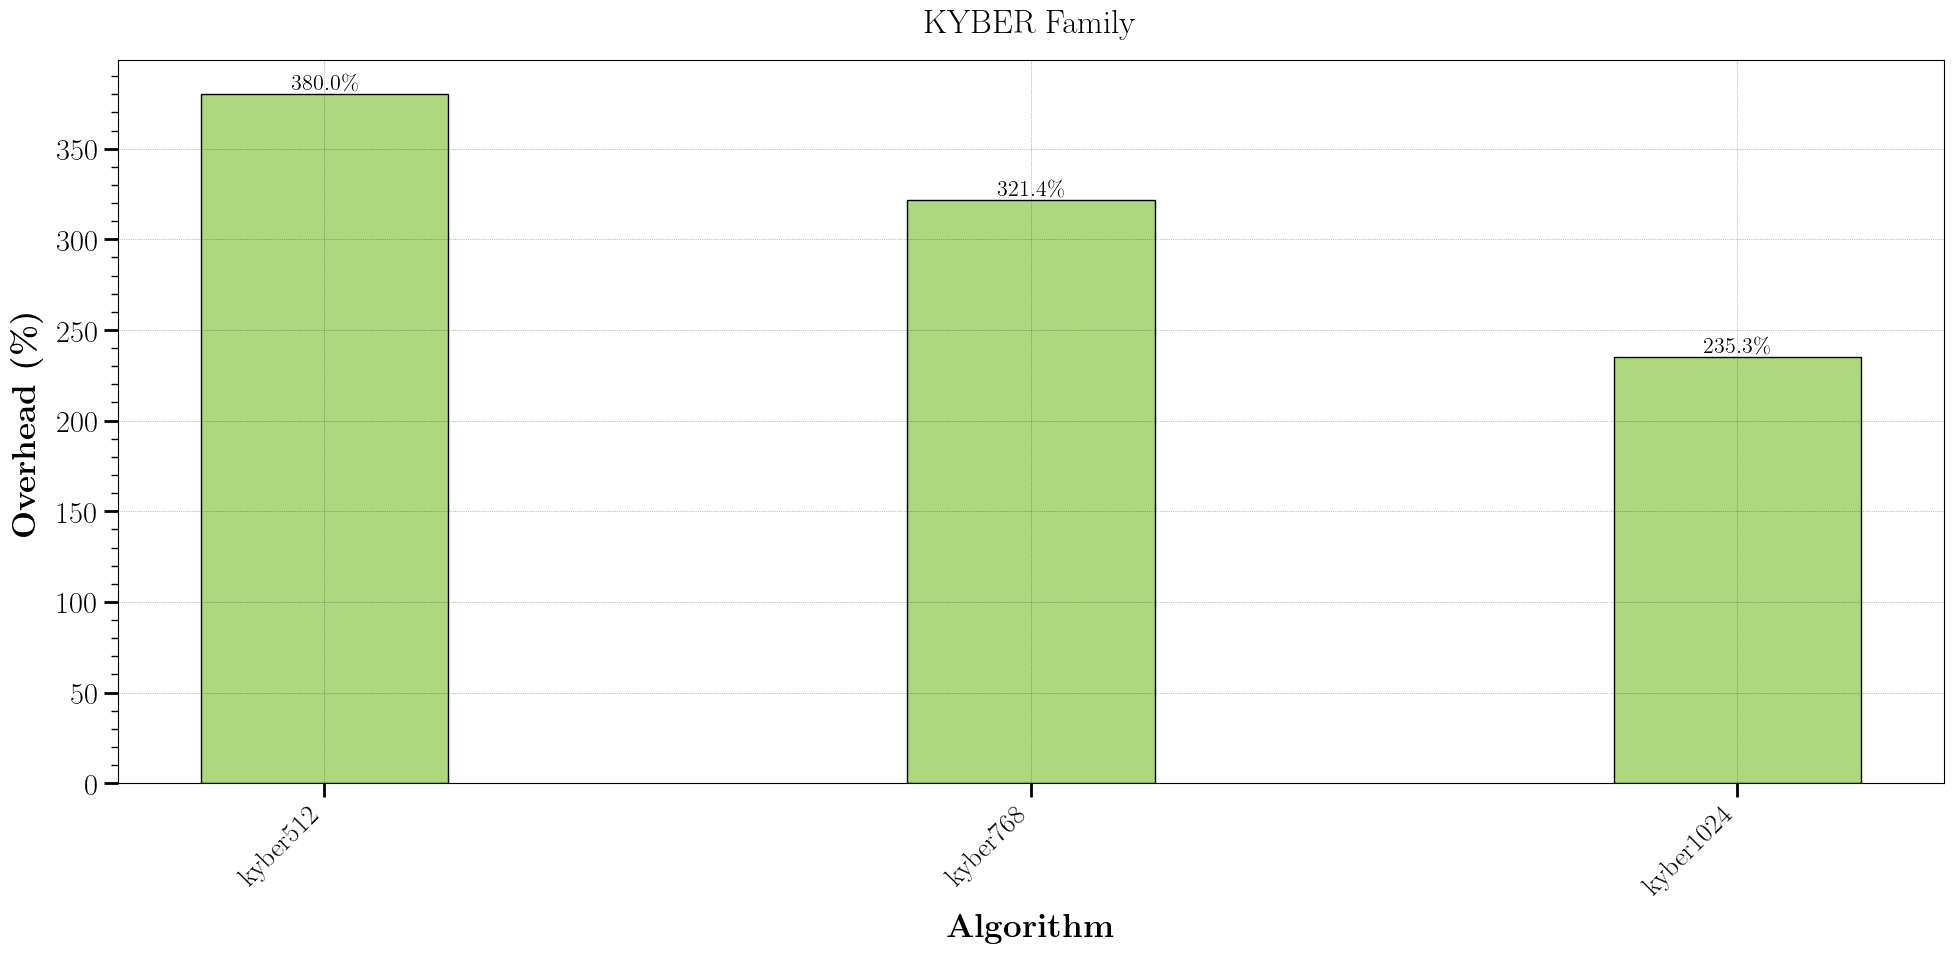

In [29]:
plot_kem_comparison(comparison_stats=comparison_stats, family="kyber", operation='KeyGen(ms)', overhead=True, plot_title="kyber_comparison_keygen_overhead.pdf")

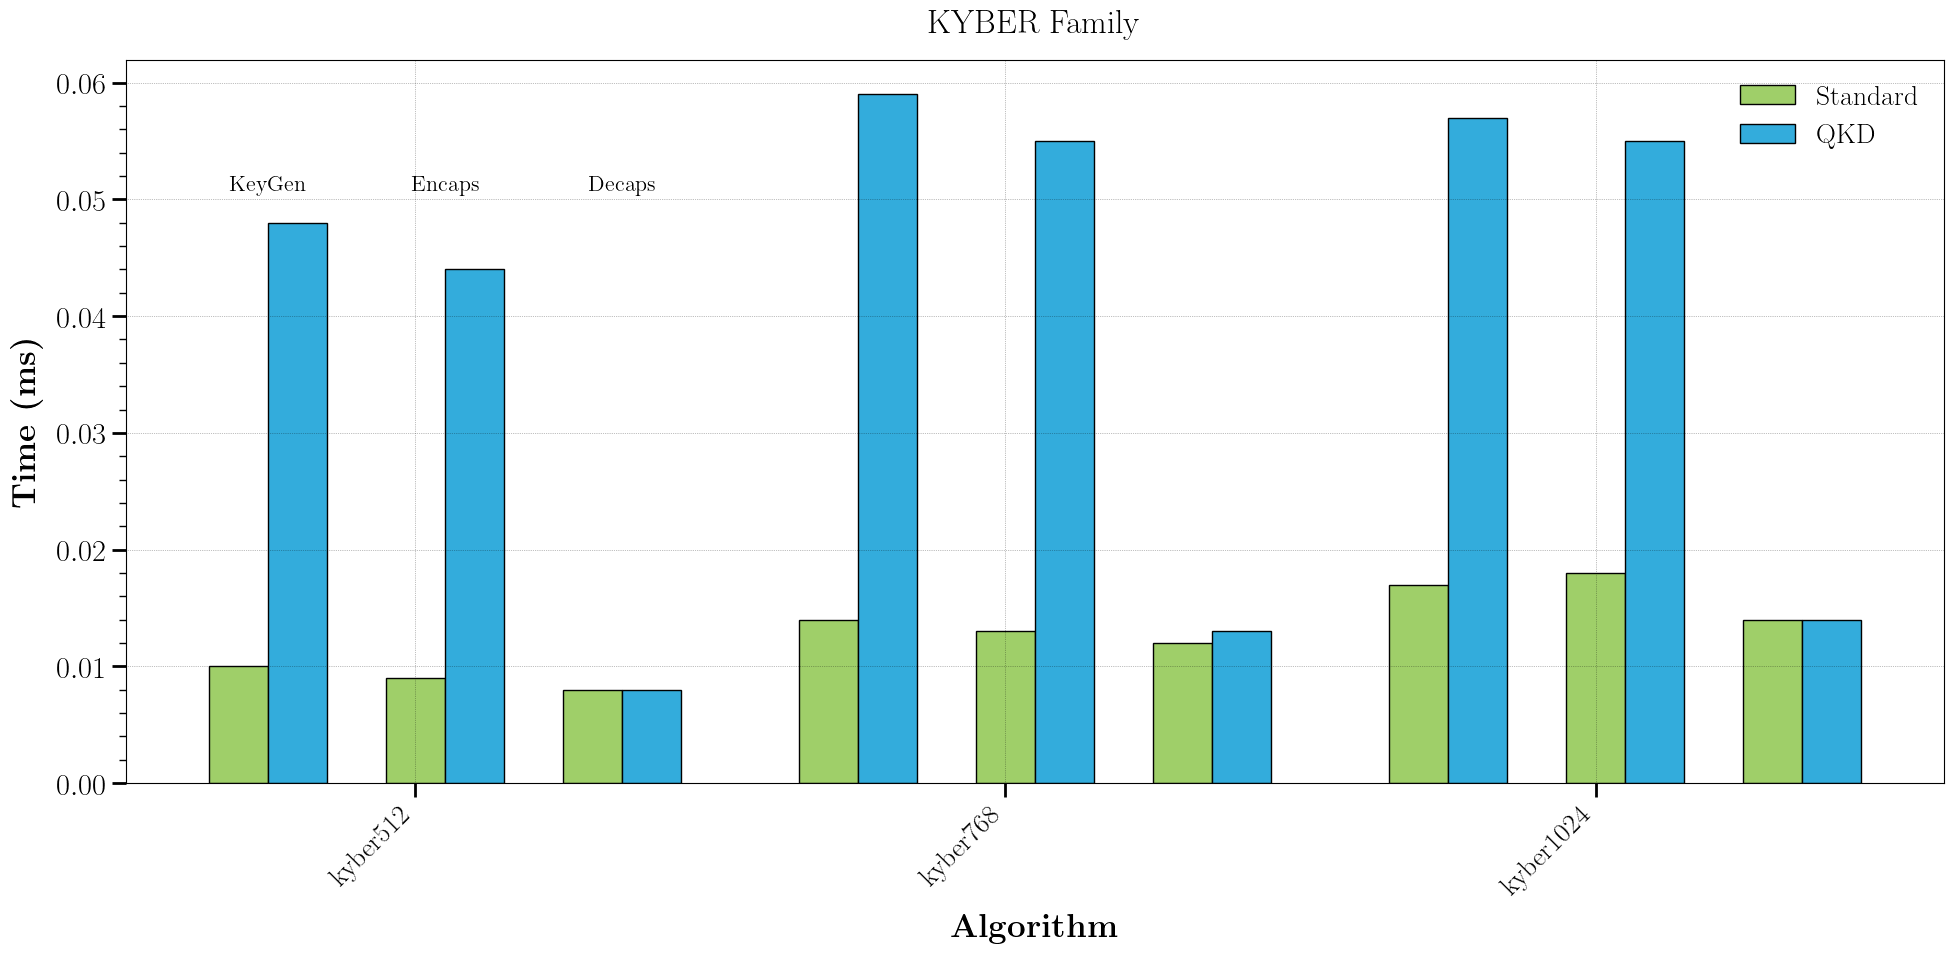

In [30]:
plot_kem_comparison(comparison_stats=comparison_stats, family="kyber", operation='all', plot_title="kyber_comparison_ops.pdf")

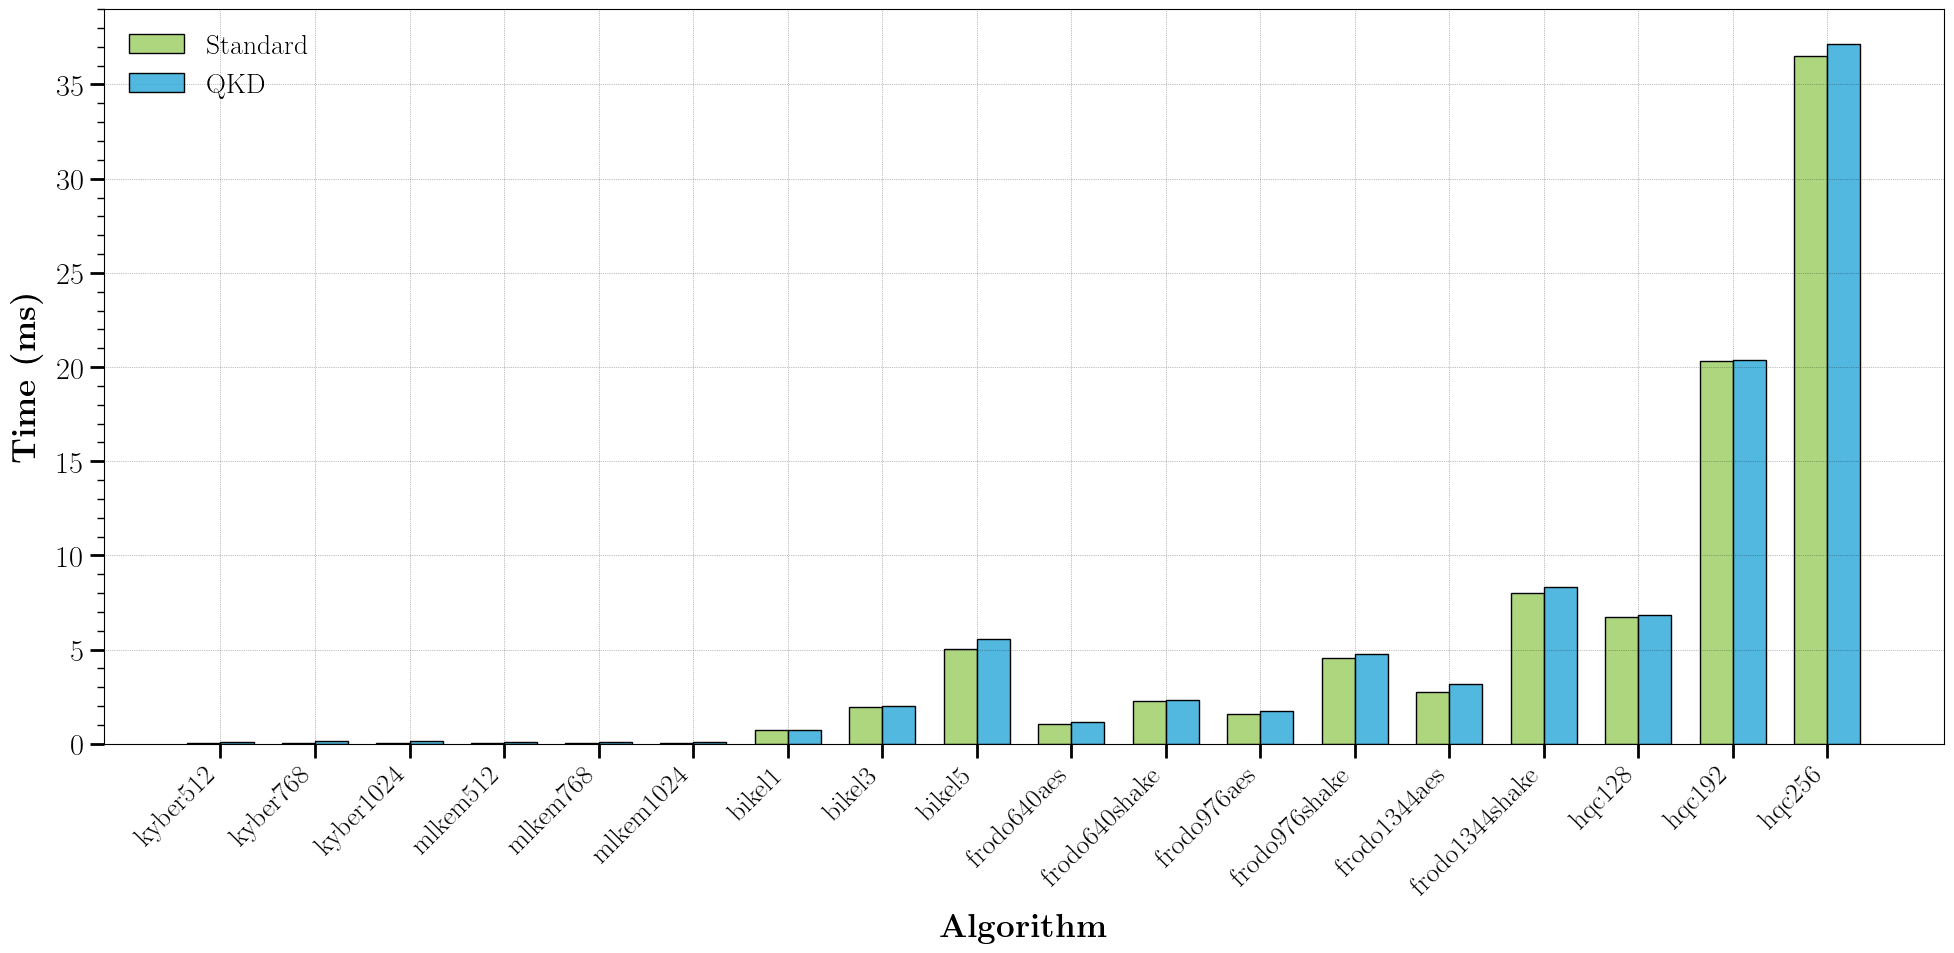

In [31]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, plot_title="kems_comparison.pdf")

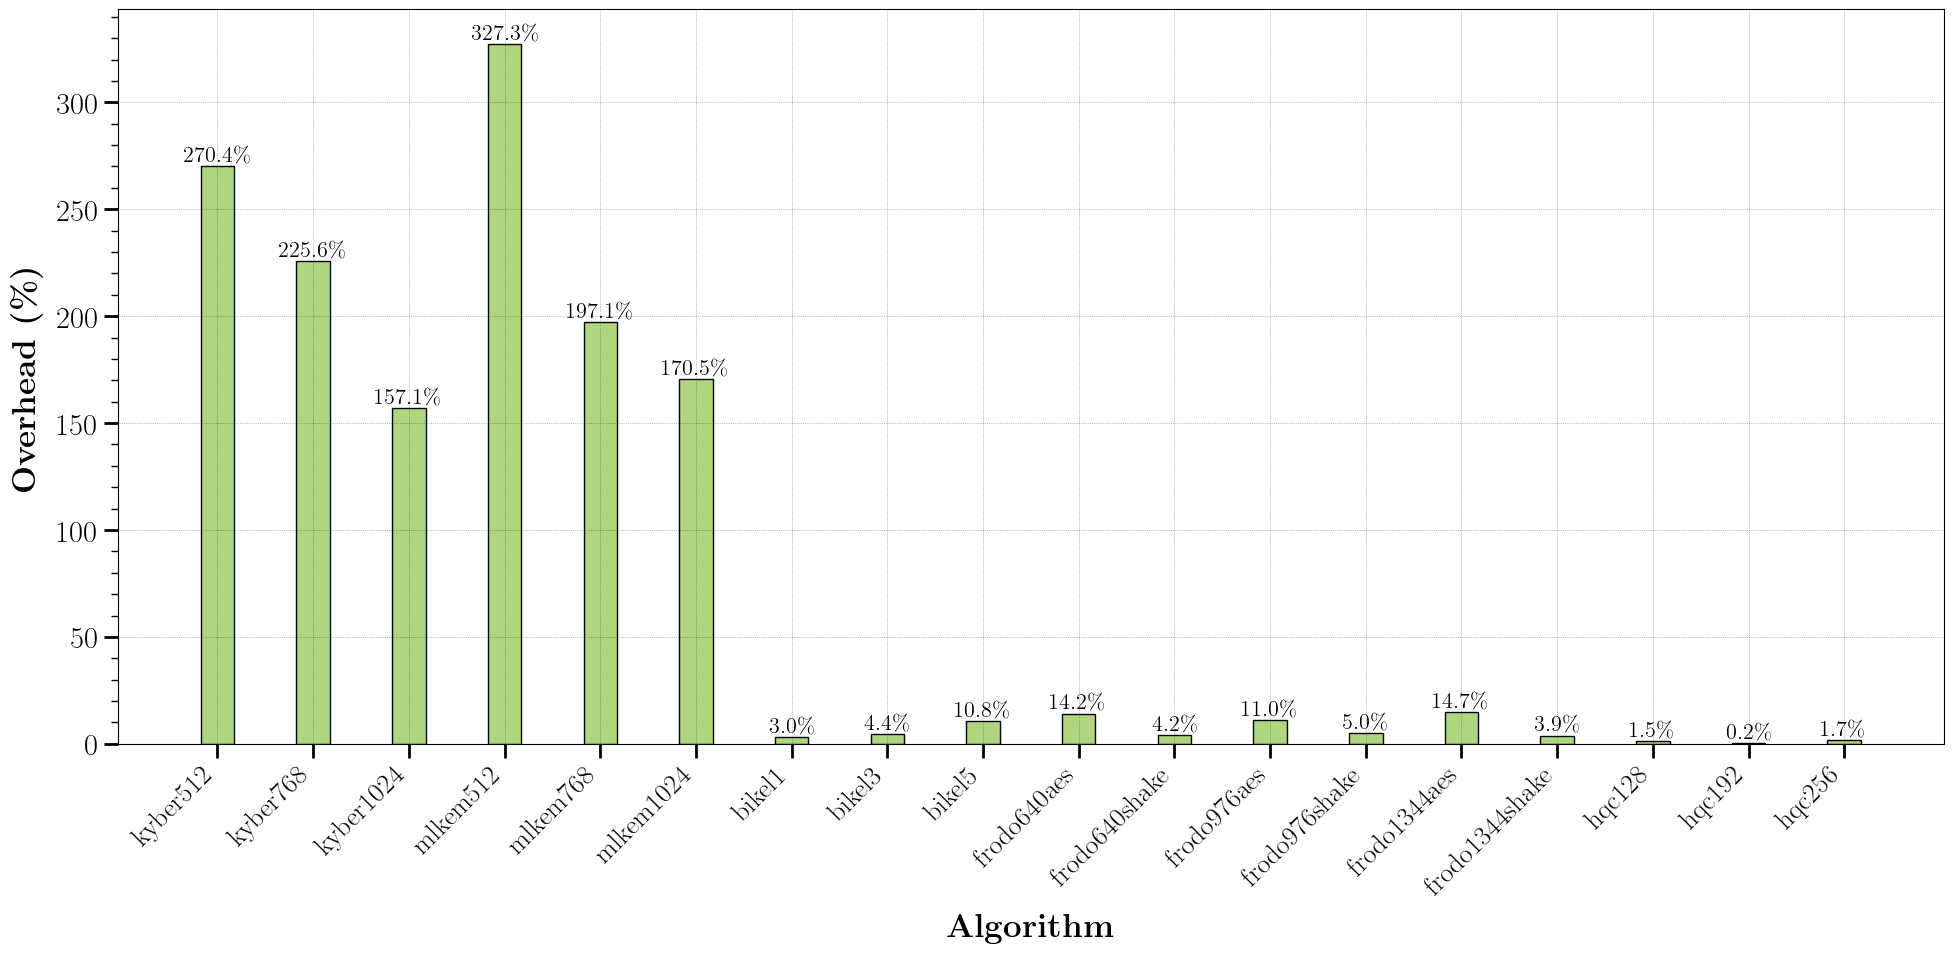

In [32]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, plot_title="kems_comparison_overhead.pdf")